# Comparing AirBnb in Copenhagen & Singapore

In this project, we will be using the dataset derived from an online scraped website, Inside AirBnb (http://insideairbnb.com/) We seek to compare the features in these AirBnb listed in different geographical locations, namely 2 of the top few most expensive cities in the East and West. 

### 1. Exploring the Dataset

In the first part, we will import the relevant datasets of listings in both cities as well as the relevant libraries required for subsequent analysis. To gauge the comparabilty of the datasets across 2 cities, we will look at the number of listings, contribution of top hosts and top airbnbs. 

In [1]:
## Importing the Libraries required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.metrics import explained_variance_score
#import xgboost as xgb


! Need to install xgboost on anaconda prompt  `conda install -c anaconda py-xgboost`

In [2]:
## Importing the Dataset 

sg_listing_gz = pd.read_csv('SG_listings_gz.csv', low_memory = False)
cph_listing_gz = pd.read_csv('CPH_listings_gz.csv' , low_memory = False)

In [3]:
## Basic Data Exploration - Looking at the columns, data types and size

# For Copenhagen
print("Columns: ", cph_listing_gz.keys())
print("Data Types: ", cph_listing_gz.dtypes)
print("Data Size", cph_listing_gz.shape)


# For Singapore
print("Columns: ", sg_listing_gz.keys())
print("Data Types: ", sg_listing_gz.dtypes)
print("Data Size", sg_listing_gz.shape)

Columns:  Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)
Data Types:  id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
descr

In [4]:
## Looking at the current dataset for Copenhagen
cph_listing_gz.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6983,https://www.airbnb.com/rooms/6983,20200228145428,2020-02-29,Copenhagen 'N Livin',Lovely apartment located in the hip Nørrebro a...,Beautiful and cosy apartment conveniently loca...,Lovely apartment located in the hip Nørrebro a...,none,"Nice bars and cozy cafes just minutes away, ye...",...,f,f,moderate,f,f,1,0,1,0,1.32
1,26057,https://www.airbnb.com/rooms/26057,20200228145428,2020-02-29,Lovely house - most attractive area,Our lovely house in the center of the city is ...,Totally charming old 150 m2 stone house from y...,Our lovely house in the center of the city is ...,none,The neighborhood is the most famous one and th...,...,f,f,moderate,f,f,1,1,0,0,0.66
2,26473,https://www.airbnb.com/rooms/26473,20200228145428,2020-02-29,City Centre Townhouse Sleeps 1-12 persons,TOWN HOUSE ON KNABROSTRÆDE - located in the ab...,The house is a total of 240sqm divided on 4 fl...,TOWN HOUSE ON KNABROSTRÆDE - located in the ab...,none,NaN,...,f,f,moderate,f,f,2,2,0,0,2.56


In [5]:
## Looking at current dataset for Singapore 
sg_listing_gz.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,2.020020e+13,2020-02-28,COZICOMFORT LONG TERM STAY ROOM 2,NaN,This is Room No. 2.(available after Jan 15 201...,This is Room No. 2.(available after Jan 15 201...,none,NaN,...,f,f,flexible,t,t,2,0,2,0,0.01
1,50646,https://www.airbnb.com/rooms/50646,2.020020e+13,2020-02-27,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,"Good Condition room, bright & windy. Comes wit...",Fully furnished bedroom with a nice view on th...,none,The serenity & quiet surrounding makes it an i...,...,f,f,moderate,f,t,1,0,1,0,0.25
2,56334,https://www.airbnb.com/rooms/56334,2.020020e+13,2020-02-28,COZICOMFORT,NaN,This is Room no. 1. USD700 per month On the fa...,This is Room no. 1. USD700 per month On the fa...,none,NaN,...,f,f,flexible,t,t,2,0,2,0,0.19


#### Comparing Listings in Copenhagen & Singapore
 - Comparing the `first_review` date
 - Comparing the top 10 listings based on `host_id` and `id`

In [6]:
## Since the 'first_review' column dtype is object, we have to first convert it to the right date time format

# For Copenhagen
cph_listing_gz.first_review = pd.to_datetime(cph_listing_gz.first_review) 
print("Copenhagen - Earliest Review: ", cph_listing_gz.first_review.min(), "Latest Review: ", cph_listing_gz.first_review.max())
      
# For Singapore
sg_listing_gz.first_review = pd.to_datetime(sg_listing_gz.first_review)
print("Singapore - Earliest Review: ", sg_listing_gz.first_review.min(), "Latest Review: ", sg_listing_gz.first_review.max())

Copenhagen - Earliest Review:  2009-09-04 00:00:00 Latest Review:  2020-02-28 00:00:00
Singapore - Earliest Review:  2011-05-04 00:00:00 Latest Review:  2020-02-27 00:00:00


In [7]:
# For Copenhagen
top_host_cph = cph_listing_gz.host_id.value_counts().head(10)
print(top_host_cph)

## Finding top apartment leased 
top_airbnb_cph = cph_listing_gz.id.value_counts().head(10)
print(top_airbnb_cph)

187610263    296
155348640    104
201720555     79
161804919     47
3326097       39
2702857       28
179753578     24
3678419       16
18084822      14
155879737     14
Name: host_id, dtype: int64
24774655    1
35303039    1
25525861    1
21104234    1
15214190    1
23058032    1
23907955    1
8648308     1
34858614    1
6352503     1
Name: id, dtype: int64


In [8]:
# For Singapore
top_host_sg = sg_listing_gz.host_id.value_counts().head(10)
print(top_host_sg)

## Finding top apartment leased 
top_airbnb_sg = sg_listing_gz.id.value_counts().head(10)
print(top_airbnb_sg)

66406177     340
209913841    167
8492007      166
29420853     145
2413412      128
108773366    115
219550151    105
31464513     100
8948251       96
23722617      92
Name: host_id, dtype: int64
9519477     1
35949995    1
41385365    1
33645974    1
42144452    1
9866651     1
28054617    1
33645982    1
40122637    1
19236258    1
Name: id, dtype: int64


`id` Conclusion: Unique listings in both Singapore and Copenhagen

`host id` Singapore more likely to have management teams - where the top hosts have 340 > 296 listings compared to copenhagen

Text(0.5,0,'Host IDs')

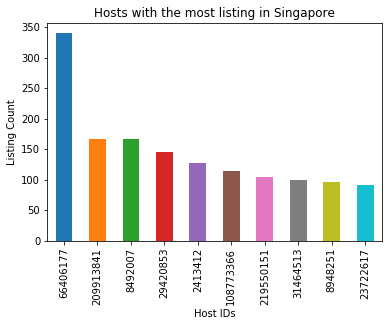

In [9]:
# Plot number of listing for top 10 host 
top_10_host_sg = top_host_sg.plot(kind='bar')
top_10_host_sg.set_title('Hosts with the most listing in Singapore')
top_10_host_sg.set_ylabel('Listing Count')
top_10_host_sg.set_xlabel('Host IDs')

#### Null Values: 

Empty values 
Define the function `percent_na`
Determine the proportion of null values 

In [10]:
## Analysis of Null Values: 
def percent_na(dataframe): 
    bools = dataframe.isnull().tolist()
    percent_na = float(bools.count(True)) / float(len(bools))
    return percent_na, float(bools.count(True))

Null Values:  id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               60
summary                                          1077
space                                           11449
description                                       496
experiences_offered                                 0
neighborhood_overview                           12439
notes                                           20745
transit                                         11314
access                                          15616
interaction                                     14142
house_rules                                     13103
thumbnail_url                                   28418
medium_url                                      28418
picture_url                                         0
xl_picture_url

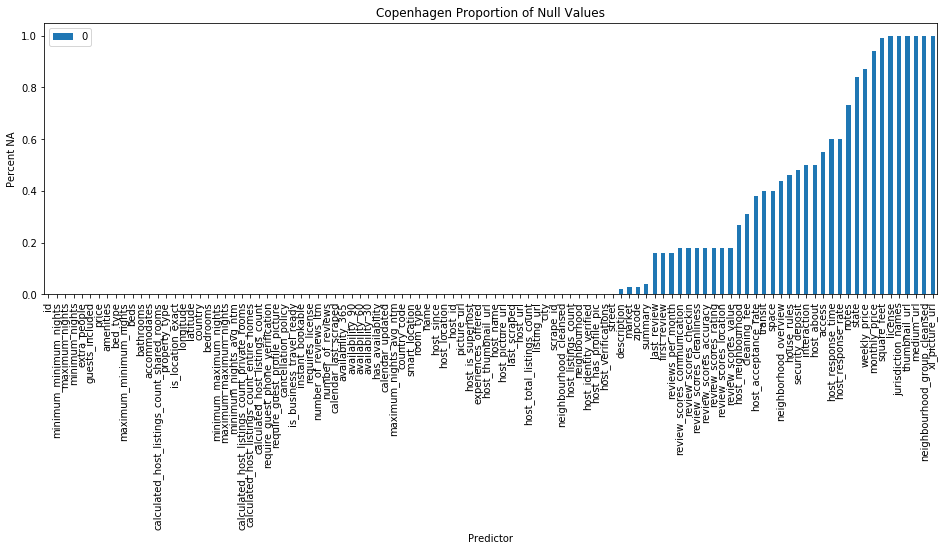

In [11]:
# For Copenhagen
print("Null Values: ", cph_listing_gz.isnull().sum())

empty_features_cph = []
missing_col_cph = []

for i in range(0, cph_listing_gz.shape[1]): 
    p, n = percent_na(cph_listing_gz.iloc[:,i])
    if n > 0:
        missing_col_cph.append(cph_listing_gz.values[i])
    empty_features_cph.append(round((p),2))
    
empty_dict_cph = dict(zip(cph_listing_gz.columns.values.tolist(), empty_features_cph))

empty_plot_cph = pd.DataFrame.from_dict(empty_dict_cph, orient = 'index').sort_values(by = 0)
ax = empty_plot_cph.plot(kind = 'bar', figsize = (16,5))
ax.set_xlabel('Predictor')
ax.set_ylabel('Percent NA')
ax.set_title("Copenhagen Proportion of Null Values")
plt.show()

Null Values:  id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               2
summary                                          323
space                                           2101
description                                      221
experiences_offered                                0
neighborhood_overview                           3283
notes                                           3493
transit                                         3265
access                                          3026
interaction                                     3496
house_rules                                     4266
thumbnail_url                                   8047
medium_url                                      8047
picture_url                                        0
xl_picture_url                  

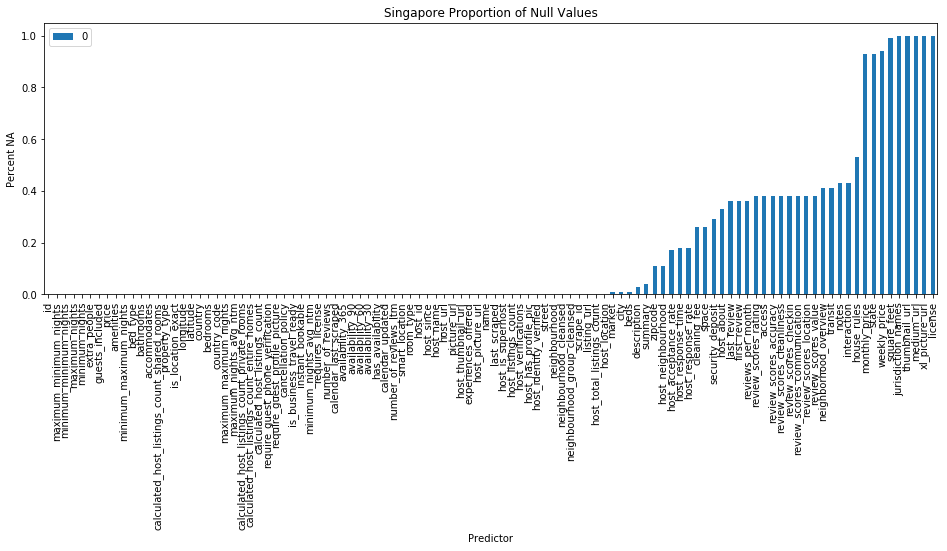

In [12]:
# For Singapore
print("Null Values: ", sg_listing_gz.isnull().sum())

empty_features_sg = []
missing_col_sg = []

for i in range(0, sg_listing_gz.shape[1]): 
    p, n = percent_na(sg_listing_gz.iloc[:,i])
    if n > 0:
        missing_col_sg.append(sg_listing_gz.values[i])
    empty_features_sg.append(round((p),2))
    
empty_dict_sg = dict(zip(sg_listing_gz.columns.values.tolist(), empty_features_sg))

empty_plot_sg = pd.DataFrame.from_dict(empty_dict_sg, orient = 'index').sort_values(by = 0)
ax = empty_plot_sg.plot(kind = 'bar', figsize = (16,5))
ax.set_xlabel('Predictor')
ax.set_ylabel('Percent NA')
ax.set_title("Singapore Proportion of Null Values")
plt.show()

Since there are 106 columns, with many repeated or redundant columns we will remove them subsequently. For simplicity, the columns that are inputted by owners directly such as descriptions, property names will be dropped as well. 

### 2. Data Cleaning 

For subsequent meaningful analysis, we would have to remove the redundant columns and convert the remaining dataset into their respective formats for further analysis. 

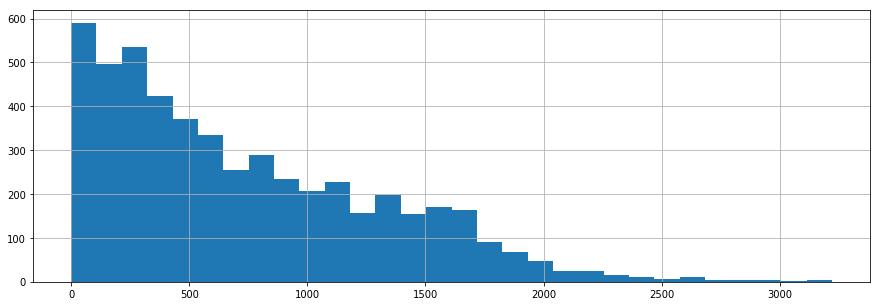

In [13]:
## Exclude? Counting number of days between first review and date data extracted

from datetime import datetime
sg_listing_gz['time_since_first_review'] = (datetime(2020, 2, 27) - sg_listing_gz.first_review).astype('timedelta64[D]')
sg_listing_gz.time_since_first_review.hist(figsize=(15,5), bins=30)

def bin_column(col, bins, labels, na_label='unknown'):
    sg_listing_gz[col] = pd.cut(sg_listing_gz[col], bins=bins, labels=labels, include_lowest=True)
    sg_listing_gz[col] = sg_listing_gz[col].astype('str')
    sg_listing_gz[col].fillna(na_label, inplace=True)

bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(sg_listing_gz.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

In [14]:
## Filter out meaningful attributes regarding property features for visualisatio
# Only attributes with pre-defined options selected - exclude 'description' due to complex regex analysis
# What other factors to keep?

## Standardise columns 
incl = ['id', "price","city","longitude","latitude","review_scores_rating","number_of_reviews","minimum_nights","security_deposit","cleaning_fee","accommodates","bathrooms","bedrooms","beds","property_type","room_type","availability_365" ,"host_identity_verified", "host_is_superhost","host_response_time", "host_since","cancellation_policy", 'neighbourhood_cleansed', 'amenities'] 

## Apply to both Copenhagen and Singapore 
listing_filtered_sg = sg_listing_gz[incl]
listing_filtered_cph = cph_listing_gz[incl]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020AACA77CC0>,
      dtype=object)

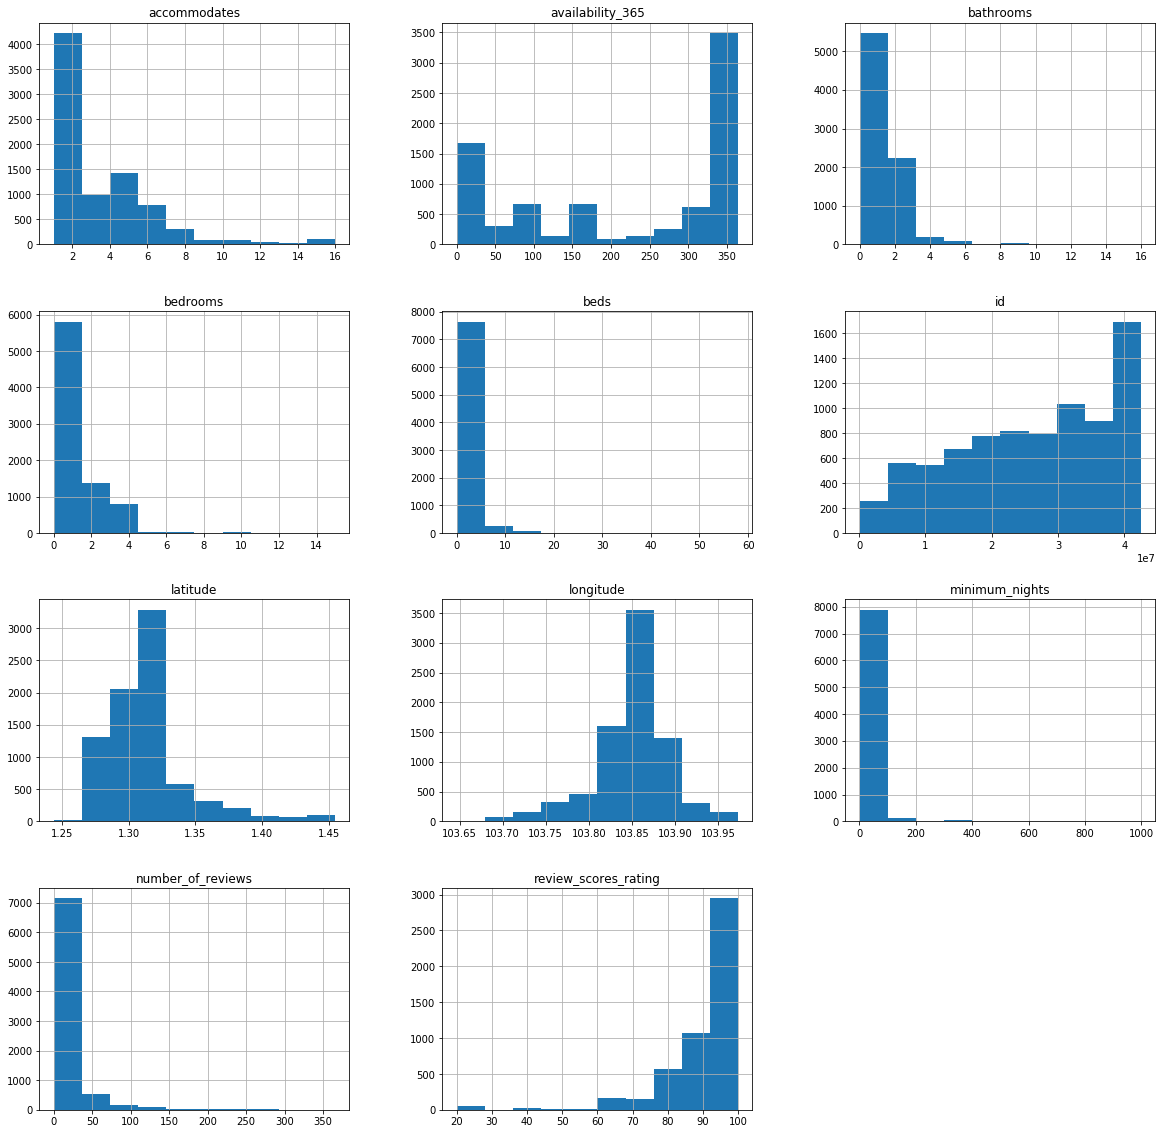

In [15]:
## For Copenhagen: 
listing_filtered_sg.hist(figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020AD25E3D68>,
      dtype=object)

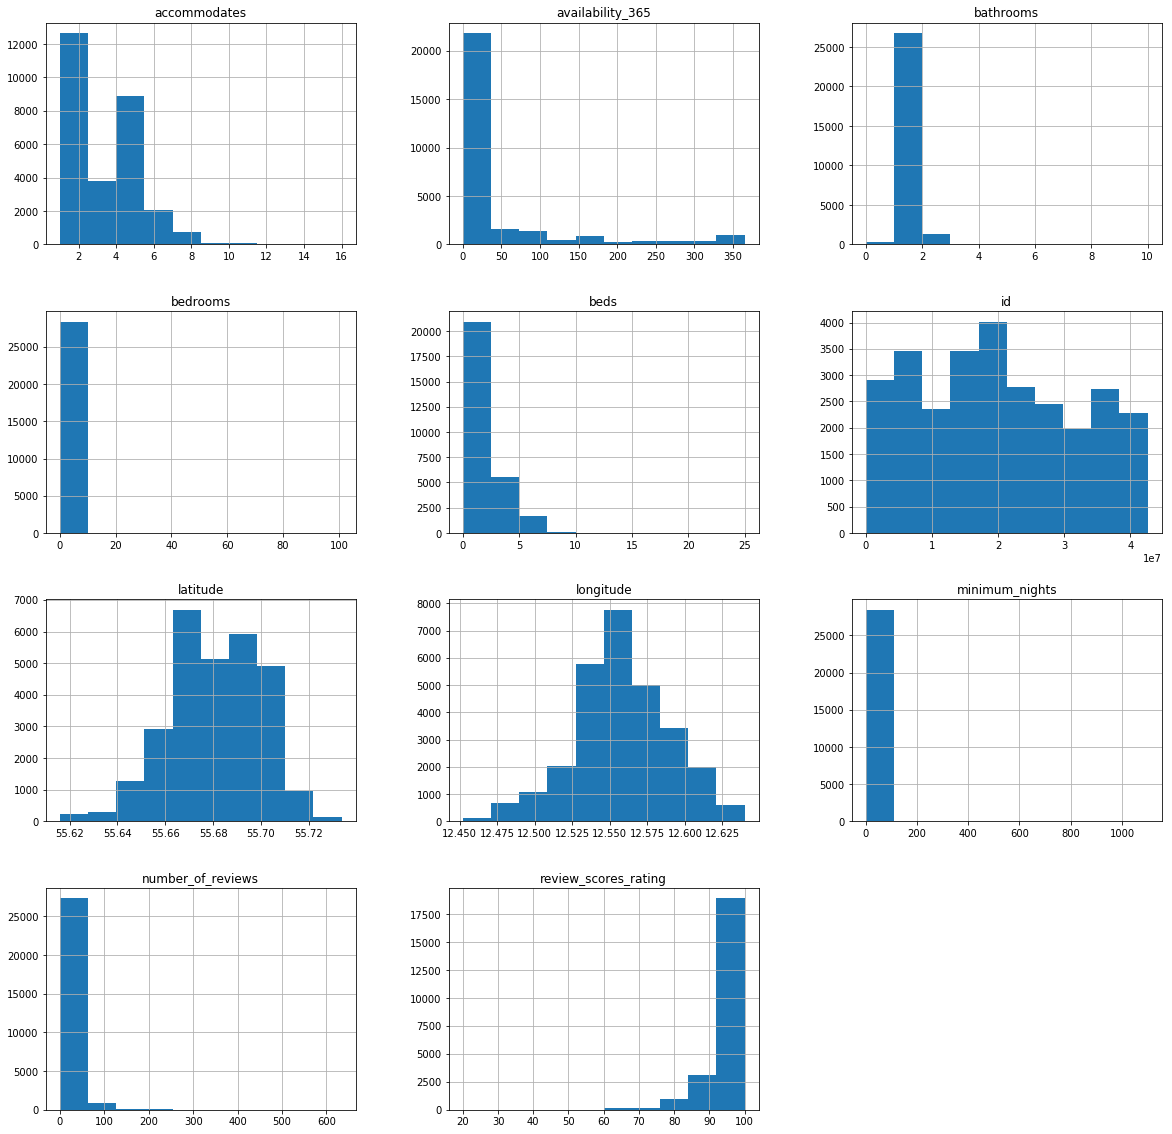

In [16]:
## For Singapore: 
listing_filtered_cph.hist(figsize = (20,20))

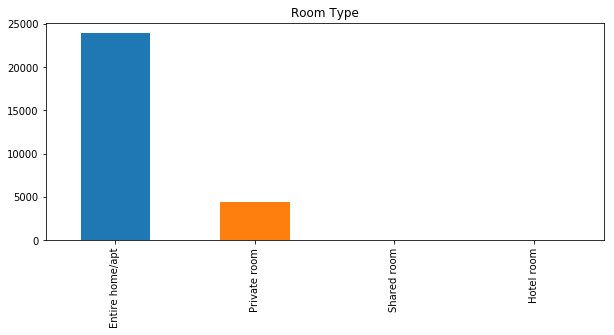

[Text(0,0,'Apartment'),
 Text(0,0,'House'),
 Text(0,0,'Condominium'),
 Text(0,0,'Loft'),
 Text(0,0,'Villa'),
 Text(0,0,'Townhouse'),
 Text(0,0,'Guest suite'),
 Text(0,0,'Other'),
 Text(0,0,'Bed and breakfast'),
 Text(0,0,'Houseboat'),
 Text(0,0,'Farm stay'),
 Text(0,0,'Bungalow'),
 Text(0,0,'Boat'),
 Text(0,0,'Serviced apartment'),
 Text(0,0,'Guesthouse'),
 Text(0,0,'Tiny house'),
 Text(0,0,'Hostel'),
 Text(0,0,'Barn'),
 Text(0,0,'Earth house'),
 Text(0,0,'Tent'),
 Text(0,0,'Cottage'),
 Text(0,0,'Lighthouse'),
 Text(0,0,'Boutique hotel'),
 Text(0,0,'Camper/RV'),
 Text(0,0,'Cabin'),
 Text(0,0,'Hut'),
 Text(0,0,'Island'),
 Text(0,0,'Hotel'),
 Text(0,0,'Aparthotel'),
 Text(0,0,'Casa particular (Cuba)')]

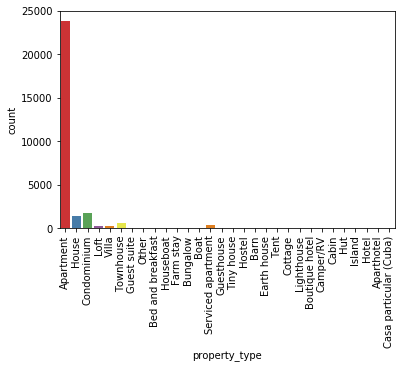

In [17]:
## Comparing the distribution of room type & property type

# For Copenhagen
plt.figure(figsize = (10,4))
listing_filtered_cph.room_type.value_counts().plot(kind = 'bar')
plt.title("Room Type")
plt.show()

property_dist_cph = sns.countplot(data = listing_filtered_cph, x = 'property_type', palette = 'Set1')
property_dist_cph.set_xticklabels(property_dist_cph.get_xticklabels(), rotation = 90)


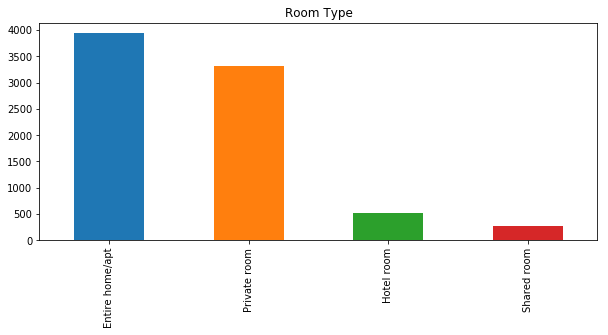

[Text(0,0,'Apartment'),
 Text(0,0,'Villa'),
 Text(0,0,'House'),
 Text(0,0,'Townhouse'),
 Text(0,0,'Other'),
 Text(0,0,'Condominium'),
 Text(0,0,'Serviced apartment'),
 Text(0,0,'Guest suite'),
 Text(0,0,'Bed and breakfast'),
 Text(0,0,'Hostel'),
 Text(0,0,'Loft'),
 Text(0,0,'Bungalow'),
 Text(0,0,'Aparthotel'),
 Text(0,0,'Chalet'),
 Text(0,0,'Hotel'),
 Text(0,0,'Guesthouse'),
 Text(0,0,'Boat'),
 Text(0,0,'Boutique hotel'),
 Text(0,0,'Cabin'),
 Text(0,0,'Tent'),
 Text(0,0,'Campsite'),
 Text(0,0,'Bus'),
 Text(0,0,'Farm stay'),
 Text(0,0,'Heritage hotel (India)'),
 Text(0,0,'Earth house'),
 Text(0,0,'Tiny house')]

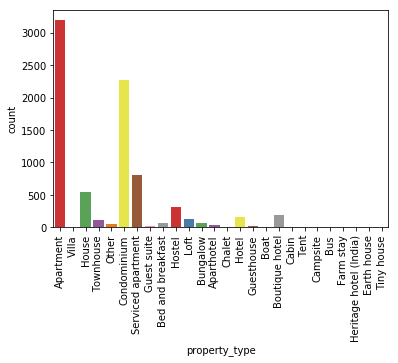

In [18]:
# For Singapore
plt.figure(figsize = (10,4))
listing_filtered_sg.room_type.value_counts().plot(kind = 'bar')
plt.title("Room Type")
plt.show()

property_dist_sg = sns.countplot(data = listing_filtered_sg, x = 'property_type', palette = 'Set1')
property_dist_sg.set_xticklabels(property_dist_sg.get_xticklabels(), rotation = 90)


In [19]:
import re
price_list = ['price', 'cleaning_fee', 'security_deposit']

for col in price_list: 
    listing_filtered_cph[col] = listing_filtered_cph[col].fillna('0')
    listing_filtered_cph[col] = listing_filtered_cph[col].apply(lambda x: float(re.compile('[^0-9eE.]').sub('', x)) if len(x)>0 else 0)
    listing_filtered_sg[col] = listing_filtered_sg[col].fillna('0')
    listing_filtered_sg[col] = listing_filtered_sg[col].apply(lambda x: float(re.compile('[^0-9eE.]').sub('', x)) if len(x)>0 else 0)

C:\Users\Seng Jing Yi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Seng Jing Yi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Seng Jing Yi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

In [20]:
# For Copenhagen - Describing Price 
listing_filtered_cph[['price', 'cleaning_fee', 'security_deposit']].describe()

,price,cleaning_fee,security_deposit
count,28418.000000,28418.000000,28418.000000
mean,855.387360,211.789500,744.954008
std,1390.248327,250.647728,2455.097371
min,0.000000,0.000000,0.000000
25%,498.000000,0.000000,0.000000
50%,703.000000,150.000000,0.000000
75%,996.000000,300.000000,0.000000
max,149453.000000,4000.000000,35293.000000


In [21]:
## Looking at distribution of price - Setting limit 99.5%

print("CPH: Original Skew: ", listing_filtered_cph['price'].skew()) 
#58.9 - Expected to be high, but should not be more than 3

# Hence need to filter - Set upper limit at 99.5%
upper_limit_cph = listing_filtered_cph['price'].quantile(0.995)
lower_limit = 0 # Because theoretically min price = 0 (Unlikely)
price_filtered_cph = listing_filtered_cph[listing_filtered_cph['price']< upper_limit_cph].reset_index(drop = True)

#Testing for skewness again
print("CPH: Skew after filtering: ",price_filtered_cph['price'].skew())

CPH: Original Skew:  58.910884499093
CPH: Skew after filtering:  2.294709113725828


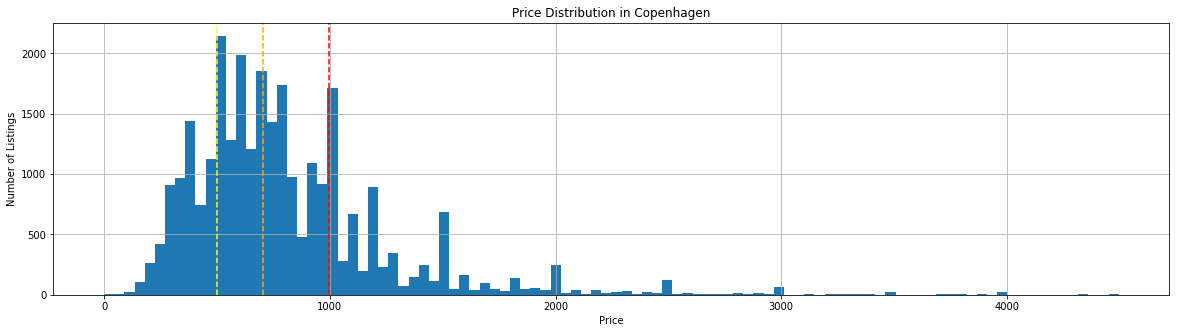

In [22]:
## Plot Price distribution aft filtering

plt.figure(figsize = (20,5))
listing_filtered_cph.price.hist(bins = 100, range = (0, upper_limit_cph))
plt.axvline(listing_filtered_cph['price'].quantile(0.25), color = 'yellow', linestyle = '--') # 25 percentile
plt.axvline(listing_filtered_cph['price'].quantile(0.5), color = 'orange', linestyle = '--') # 50 percentile
plt.axvline(listing_filtered_cph['price'].quantile(0.75), color = 'red', linestyle = '--') # 75 percentile
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.title('Price Distribution in Copenhagen')
plt.show()



In [23]:
# For Singapore - Describing Price
listing_filtered_sg[['price', 'cleaning_fee', 'security_deposit']].describe()

,price,cleaning_fee,security_deposit
count,8047.000000,8047.000000,8047.000000
mean,170.213371,28.684851,173.085995
std,320.329233,38.151328,438.781164
min,0.000000,0.000000,0.000000
25%,66.000000,0.000000,0.000000
50%,126.000000,20.000000,0.000000
75%,199.000000,45.000000,200.000000
max,10000.000000,600.000000,6990.000000


In [24]:
## Looking at distribution of price - Setting limit 99.5%

print("SG: Original Skew: ", listing_filtered_sg['price'].skew()) 
#18.9 - Expected to be high, but should not be more than 3

# Hence need to filter - Set upper limit at 99.5%
upper_limit_sg = listing_filtered_sg['price'].quantile(0.995)
lower_limit = 0 # Because theoretically min price = 0 (Unlikely)
price_filtered_sg = listing_filtered_sg[listing_filtered_sg['price']< upper_limit_sg].reset_index(drop = True)

#Testing for skewness again
print("SG: Skew after filtering: ",price_filtered_sg['price'].skew())

SG: Original Skew:  18.890290878980085
SG: Skew after filtering:  2.5824199313097775


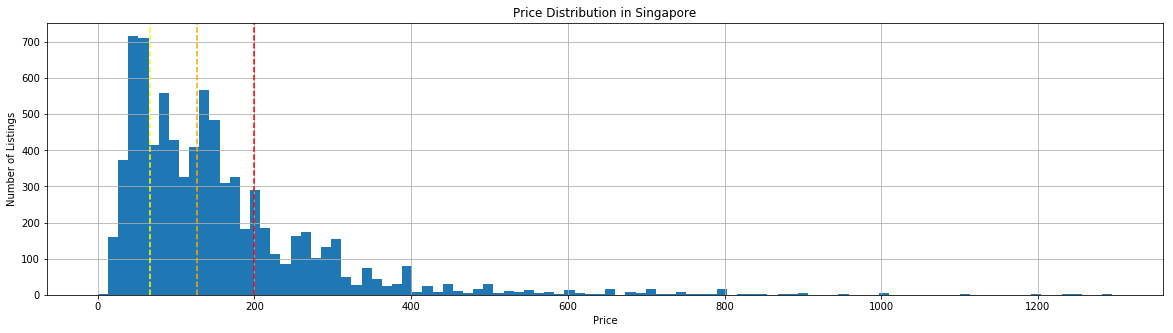

In [25]:
## Price Distributuon 
plt.figure(figsize = (20,5))
listing_filtered_sg.price.hist(bins = 100, range = (0, upper_limit_sg))
plt.axvline(listing_filtered_sg['price'].quantile(0.25), color = 'yellow', linestyle = '--') # 25 percentile
plt.axvline(listing_filtered_sg['price'].quantile(0.5), color = 'orange', linestyle = '--') # 50 percentile
plt.axvline(listing_filtered_sg['price'].quantile(0.75), color = 'red', linestyle = '--') # 75 percentile
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.title('Price Distribution in Singapore')
plt.show()

Now that we have the price distribution of listings in both cities, we notice that in Copenhagen, listings are relatively evenly spreaded out, while those in Singapore are clustered around its median. This may be due to the similar property types commonly available in Singapore. To test this hypothesis, we will look at the mean price per room and property type.

#### Findings & Visualisation: 
- Aside from entire apartment, Copenhagen has a wider variety of properties listed that contributes to its higher price points such as Barn, Houseboat and Tent 

- Most common listing in Copenhagen & Singapore are still private apartments, but Singapore has more offerings for shared rooms > Possible business opportunity? or due to space constraint?

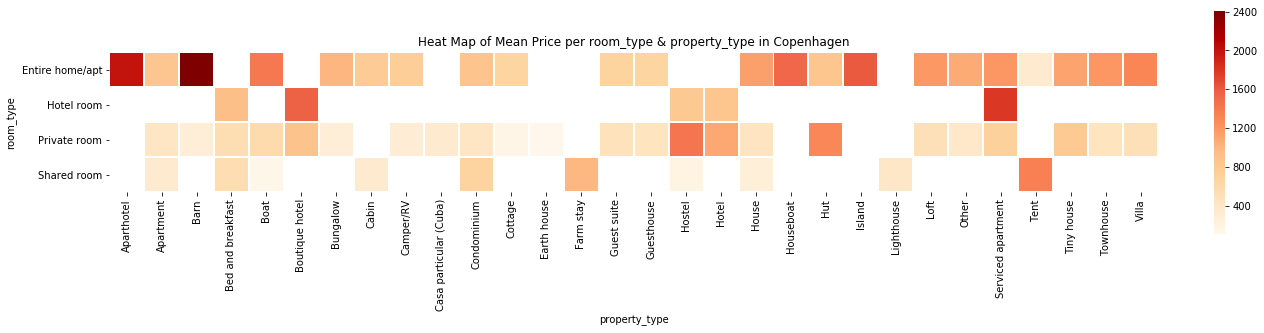

In [26]:
## Heatmap by Mean Price per room type and property type
# For Copenhagen
by_type_cph = price_filtered_cph.groupby(['room_type', 'property_type'])['price'].mean().unstack()
plt.figure(figsize = (20,20))
plt.title("Heat Map of Mean Price per room_type & property_type in Copenhagen")
map = sns.heatmap(by_type_cph, square = True, cbar_kws = {'fraction': 0.01}, cmap = 'OrRd', linewidth = 1)

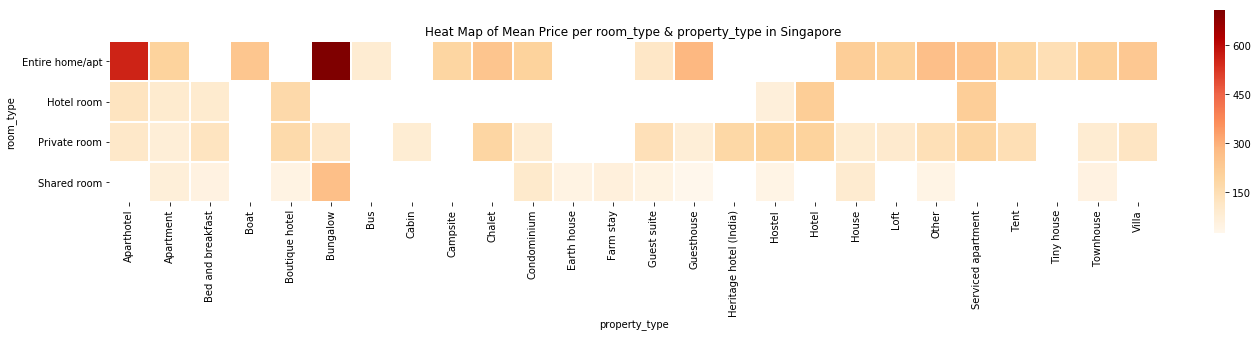

In [27]:
# For Singapore
by_type_sg = price_filtered_sg.groupby(['room_type', 'property_type'])['price'].mean().unstack()
plt.figure(figsize = (20,20))
plt.title("Heat Map of Mean Price per room_type & property_type in Singapore")
map = sns.heatmap(by_type_sg, square = True, cbar_kws = {'fraction': 0.01}, cmap = 'OrRd', linewidth = 1)

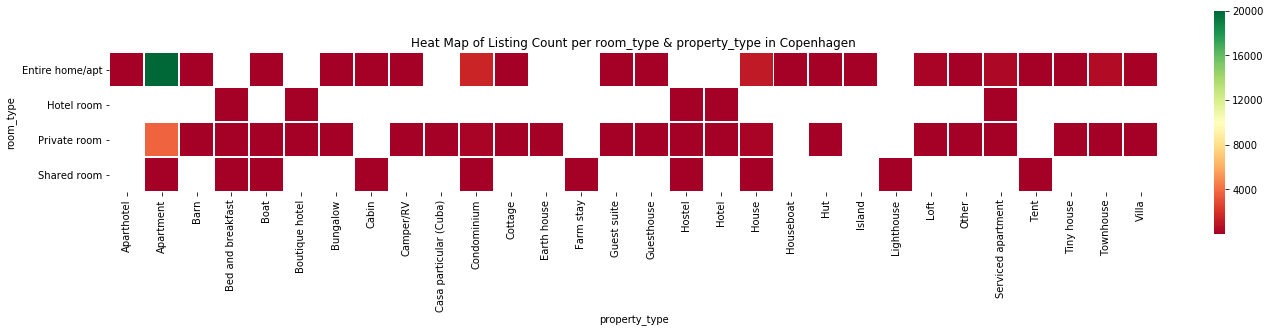

In [28]:
# For Copenhagen
count_type_cph = listing_filtered_cph.groupby(['room_type', 'property_type'])['price'].count().unstack()
plt.figure(figsize = (20,20))
plt.title("Heat Map of Listing Count per room_type & property_type in Copenhagen")
map = sns.heatmap(count_type_cph, square = True, cbar_kws = {'fraction': 0.01}, cmap = 'RdYlGn', linewidth = 1)

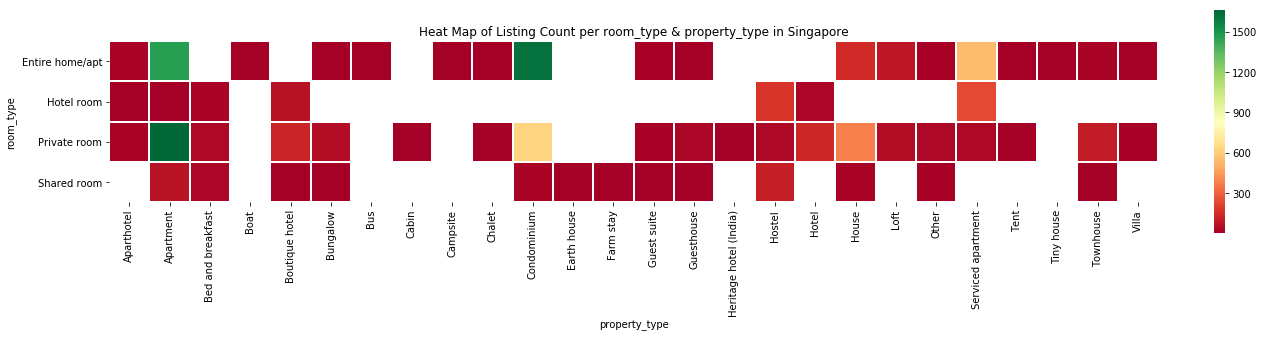

In [29]:
# For Singapore
count_type_sg = listing_filtered_sg.groupby(['room_type', 'property_type'])['price'].count().unstack()
plt.figure(figsize = (20,20))
plt.title("Heat Map of Listing Count per room_type & property_type in Singapore")
map = sns.heatmap(count_type_sg, square = True, cbar_kws = {'fraction': 0.01}, cmap = 'RdYlGn', linewidth = 1)

Before progressing for further analysis, we will have to deal with the null values in the columns retained. 
1. Check the number of null values & Drop them
2. Re-look at the dtypes of remaining columns 
 - Factorise hierarchical data attributes with integer encoding
 - Convert categorical attributes into dummy variables with one hot encoding 
 - Replace T/F boonlean attributes with binary 1/0
 - Extract array of `amenities` and `host_verifications` into dummy variables

In [30]:
info_null_dtype = pd.DataFrame({'Copenhagen': price_filtered_cph.isnull().sum(), 
                           'Singapore': price_filtered_sg.isnull().sum(), 
                          'Dtype': price_filtered_cph.dtypes})

info_null_dtype

,Copenhagen,Singapore,Dtype
id,0,0,int64
price,0,0,float64
city,13,68,object
longitude,0,0,float64
latitude,0,0,float64
review_scores_rating,5087,3030,float64
number_of_reviews,0,0,int64
minimum_nights,0,0,int64
security_deposit,0,0,float64
cleaning_fee,0,0,float64


In [31]:
## Dealing with Null Values

# Drop rows with null values in these columns
na_cols = ['bathrooms', 'bedrooms','beds']
price_filtered_cph.dropna(subset= na_cols)
price_filtered_sg.dropna(subset= na_cols)

# Replace values with 0 in the following columns
price_filtered_cph.fillna({'host_is_superhost': 0}, inplace = True)
price_filtered_sg.fillna({'host_is_superhost': 0}, inplace = True)

In [32]:
## Factorise hierarchical values with integer encoding
cancellation_policy_order = {'super_strict_60': 1, 'super_strict_30': 1, 'moderate': 2, 'strict_14_with_grace_period': 2, 'flexible': 3 }

info_cancellation = pd.DataFrame({'Copenhagen': price_filtered_cph["cancellation_policy"].value_counts(), 
                                  'Singapore': price_filtered_sg["cancellation_policy"].value_counts(), 
                                  'Order': cancellation_policy_order })

info_cancellation

,Copenhagen,Singapore,Order
flexible,12037,1498,3
moderate,8985,1260,2
strict_14_with_grace_period,6878,5242,2
super_strict_30,80,2,1
super_strict_60,295,3,1


In [33]:
price_filtered_cph.cancellation_policy = price_filtered_cph.cancellation_policy.map(cancellation_policy_order)
price_filtered_sg.cancellation_policy = price_filtered_sg.cancellation_policy.map(cancellation_policy_order)

In [34]:
## Should we include response time? or just exclude it cos a lot of null values 
response_time_order = {'within an hour': 4, 'within a few hours': 3, 'within a day': 2, 'a few days or more': 1}

info_res_time = pd.DataFrame({'Copenhagen': price_filtered_cph["host_response_time"].value_counts(), 
                                  'Singapore': price_filtered_sg["host_response_time"].value_counts(), 
                                  'Order': response_time_order})
info_res_time

,Copenhagen,Singapore,Order
a few days or more,484,150,1
within a day,2991,556,2
within a few hours,2634,1347,3
within an hour,5146,4548,4


In [35]:
price_filtered_cph.host_response_time = price_filtered_cph.host_response_time.map(response_time_order)
price_filtered_cph.host_response_time.fillna(0, inplace = True)

price_filtered_sg.host_response_time = price_filtered_sg.host_response_time.map(response_time_order)
price_filtered_sg.host_response_time.fillna(0, inplace = True)

`property_type` and `room_type`
- Since there's a variety of different property, we will drop the rare occurences and reclassify the remaining into 5 major brackets
  1. Apartment: Apartment, Condominium, Serviced Apartment, Loft, Aparthotel, Guest suite
  2. House: House, Townhouse, Bungalow, Guesthouse, Villa, Chalet, Tiny house
  3. Hotel: Boutique hotel, Hotel, Bed and breakfast
  4. Hostel: Hostel
  5. Other: Boat, Houseboat, Other
- With only 4 different room types - we will break them into dummy variables subsequently

In [36]:
## Dropping rare occurences in categories

# For Copenhagen
property_count = price_filtered_cph.groupby(['property_type']).size()
rare = list(property_count.loc[property_count <= 10].index.values)
price_filtered_cph = price_filtered_cph[~price_filtered_cph["property_type"].isin(rare)].reset_index(drop=True)

# For Singapore
property_count = price_filtered_sg.groupby(['property_type']).size()
rare = list(property_count.loc[property_count <= 10].index.values)
price_filtered_sg = price_filtered_sg[~price_filtered_sg["property_type"].isin(rare)].reset_index(drop=True)

In [37]:
## Looking at distribution of property types and room types
property_type = pd.DataFrame({'Copenhagen': price_filtered_cph.property_type.value_counts(),
                              'Singapore': price_filtered_sg.property_type.value_counts()})
property_type

,Copenhagen,Singapore
Aparthotel,NaN,32.0
Apartment,23731.0,3175.0
Bed and breakfast,17.0,69.0
Boat,17.0,NaN
Boutique hotel,NaN,198.0
Bungalow,19.0,61.0
Condominium,1709.0,2260.0
Guest suite,18.0,25.0
Guesthouse,20.0,26.0
Hostel,17.0,315.0


In [38]:
## Reclassify remaining instances into 5 major categories
property_cat = { 'Apartment': 'apartment', 'Condominium': 'apartment', 'Serviced Apartment': 'apartment', 'Loft': 'apartment', 'Aparthotel': 'apartment', 'Guest suite': 'apartment',
                'Boutique hotel': 'hotel', 'Hotel': 'hotel', 'Bed and breakfast': 'hotel', 'Hostel': 'hostel', 
                'House': 'house', 'Townhouse': 'house', 'Bungalow': 'house', 'Guesthouse': 'house', 'Villa': 'house', 'Tiny house': 'house', 
                'Other': 'other','Boat': 'other', 'Houseboat': 'other'}

price_filtered_cph.property_type = price_filtered_cph.property_type.map(property_cat)
price_filtered_sg.property_type = price_filtered_sg.property_type.map(property_cat)

In [39]:
## Looking at distribution of property types and room types
property_type = pd.DataFrame({'Copenhagen': price_filtered_cph.property_type.value_counts(),
                              'Singapore': price_filtered_sg.property_type.value_counts()})
property_type

,Copenhagen,Singapore
apartment,25679,5617
hostel,17,315
hotel,28,419
house,2115,763
other,55,58


In [40]:
room_type = pd.DataFrame({'CPH Room':  price_filtered_cph.room_type.value_counts(), 
                          'SG Room': price_filtered_sg.room_type.value_counts()})
room_type

,CPH Room,SG Room
Entire home/apt,23793,3896
Hotel room,25,513
Private room,4345,3307
Shared room,73,264


#### Dealing with Binary Values:
`host_identify_verified` 
`host_is_superhost`

In [41]:
# For Copenhagen
price_filtered_cph["host_identity_verified"] = price_filtered_cph["host_identity_verified"].apply(lambda x: 1 if x=="t" else 0)
price_filtered_cph["host_is_superhost"] = price_filtered_cph["host_is_superhost"].apply(lambda x: 1 if x=="t" else 0)

# For Singapore
price_filtered_sg["host_identity_verified"] = price_filtered_sg["host_identity_verified"].apply(lambda x: 1 if x=="t" else 0)
price_filtered_sg["host_is_superhost"] = price_filtered_sg["host_is_superhost"].apply(lambda x: 1 if x=="t" else 0)

#### Location - Considering Cities & Neighbourhood

Kindly refer to the tableau workbork for geographical plot

In [42]:
neighbourhood_cph = pd.DataFrame({'Copenhagen':price_filtered_cph.neighbourhood_cleansed.value_counts()}).reset_index(drop=False)
neighbourhood_sg = pd.DataFrame({'Singapore':price_filtered_sg.neighbourhood_cleansed.value_counts()}).reset_index(drop=False)

neighbourhood = pd.concat([neighbourhood_cph, neighbourhood_sg], axis =1)
neighbourhood

## Singapore has more discrete districts 42 vs copenhagen 11
## ? Plot attractions? What to do next > Plot price 

,index,Copenhagen,index,Singapore
0,Nrrebro,5183.0,Kallang,1163
1,Vesterbro-Kongens Enghave,4380.0,Geylang,973
2,Indre By,3697.0,Novena,592
3,Frederiksberg,3309.0,Rochor,581
4,sterbro,2992.0,Downtown Core,517
5,Amager Vest,2564.0,Outram,481
6,Amager st,2113.0,Bukit Merah,382
7,Bispebjerg,1448.0,River Valley,355
8,Valby,1236.0,Bedok,330
9,Vanlse,768.0,Queenstown,294


#### Extract Array from `amenities` and `host_verifications`

In [43]:
## Deriving unique set of amenities listed
# For Copenhagen
amenities_list = price_filtered_cph.amenities
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set_cph = [x.strip() for x in amenities_list_string.split(',')]
cph_amenities = set(amenities_set_cph)
cph_amenities

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'Amazon Echo',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Baking sheet',
 'Balcony',
 'Barbecue utensils',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Beach essentials',
 'Beach view',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Body soap',
 'Bread maker',
 'Breakfast',
 'Breakfast table',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling fan',
 'Central air conditioning',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Convection oven',
 'Cooking basics',
 'Crib',
 'DVD player',
 'Day bed',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Double oven',
 'Dryer',
 'EV charger',
 'Electric profiling bed',
 'Elevator',
 'En suite bathroom',
 

In [44]:
def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
            
    for key, value in freq.items(): 
        print (key, value)
        
# How to sort?

In [45]:
# For Copenhagen
amenities_cph_count = CountFrequency(amenities_set_cph)
amenities_cph_count

# get top 10! Kitchen, Wifi, Hair Dryer

TV 19568
Cable TV 5690
Wifi 27204
Kitchen 27432
Paid parking off premises 6095
Heating 26844
Washer 19197
Smoke detector 18144
Essentials 26576
Hangers 16591
Hair dryer 16904
Iron 17998
Laptop friendly workspace 17924
translation missing: en.hosting_amenity_49 2441
translation missing: en.hosting_amenity_50 3784
Room-darkening shades 2694
Hot water 14245
Bed linens 8104
Microwave 5479
Coffee maker 6514
Refrigerator 11127
Dishwasher 7587
Dishes and silverware 10802
Cooking basics 10217
Oven 9938
Stove 10086
Garden or backyard 4072
Luggage dropoff allowed 3004
Paid parking on premises 2681
Indoor fireplace 1337
Family/kid friendly 11872
Dryer 11668
Fire extinguisher 3777
Shampoo 14340
Bathtub 833
High chair 2924
Crib 1274
Patio or balcony 5013
Long term stays allowed 2046
Internet 7778
Buzzer/wireless intercom 8484
Self check-in 2118
Lockbox 1553
Baby bath 1666
Changing table 1417
Children’s books and toys 3175
Pack ’n Play/travel crib 946
Children’s dinnerware 1919
Host greets you 5688


In [46]:
# For Singapore
amenities_list = price_filtered_sg.amenities
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set_sg = [x.strip() for x in amenities_list_string.split(',')]
sg_amenities = set(amenities_set_sg)
sg_amenities

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Baking sheet',
 'Barbecue utensils',
 'Bathtub',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Bread maker',
 'Breakfast',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Cooking basics',
 'Crib',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'EV charger',
 'Elevator',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Extra space around bed',
 'Family/kid friendly',
 'Fire extinguisher',
 'Fireplace guards',
 'Firm mattress',
 'First aid kit',
 'Fixed grab bars for shower',
 'Fixed grab bars for toilet',
 'Flat path to guest entrance',
 

In [47]:
amenities_sg_count = CountFrequency(amenities_set_sg)
amenities_sg_count

TV 5899
Cable TV 1243
Internet 1644
Wifi 7739
Air conditioning 7735
Pets live on this property 125
Cat(s) 29
Elevator 5223
Washer 7082
Pool 4101
Kitchen 6586
Gym 3390
Family/kid friendly 1967
Essentials 7054
Shampoo 5768
Dryer 5141
Free street parking 642
Hot tub 613
Smoke detector 3070
Fire extinguisher 2966
Lock on bedroom door 4442
Hangers 6497
Hair dryer 5923
Iron 6151
Laptop friendly workspace 5624
Self check-in 1513
Keypad 633
Private entrance 2307
Children’s books and toys 126
Hot water 4733
Luggage dropoff allowed 1742
Long term stays allowed 3429
Pets allowed 1569
Dog(s) 49
Paid parking on premises 806
Heating 2584
First aid kit 2007
Microwave 3203
Refrigerator 3538
Patio or balcony 953
Garden or backyard 513
Paid parking off premises 1256
translation missing: en.hosting_amenity_50 751
Bed linens 2817
Extra pillows and blankets 1691
Ethernet connection 230
Coffee maker 432
Dishes and silverware 2970
Cooking basics 2235
Oven 1405
Stove 2540
BBQ grill 486
Host greets you 1444
Sh

In [48]:
## Categorising amenities into respective categories

# For Copenhagen
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('TV'), 'tv'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Elevator'), 'elevator'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('parking'), 'parking'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
price_filtered_cph.loc[price_filtered_cph['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1


# For Singapore
price_filtered_sg.loc[price_filtered_sg['amenities'].str.contains('Air conditioning|Air purifier'), 'air_con'] = 1
price_filtered_sg.loc[price_filtered_sg['amenities'].str.contains('24-hour check-in|Self check-in|Buzzer/wireless intercom|Building staff|Doorman|Host greets you|Keypad|Luggage dropoff allowed|Self check-in' ), 'check_in'] = 1
price_filtered_sg.loc[price_filtered_sg['amenities'].str.contains('BBQ grill|Baking sheet|Barbecue utensils|Bread maker|Coffee maker|Cooking basics|Dishes and silverware|Dishwasher|Full kitchen|Hot water kettle|Kitchen|Kitchenette|Microwave|Oven|Refrigerator|Stove' ), 'cooking'] = 1
price_filtered_sg.loc[price_filtered_sg['amenities'].str.contains('Baby bath|Baby monitor|Babysitter recommendations|Changing table|Children’s books and toys|Children’s dinnerware|Crib|Family/kid friendly|High chair|Pack ’n Play/travel crib|Shower chair|Stair gates' ), 'childcare'] = 1
price_filtered_sg.loc[price_filtered_sg['amenities'].str.contains('Cable TV|Game console|Laptop friendly workspace|TV' ), 'entertainment'] = 1
price_filtered_sg.loc[price_filtered_sg['amenities'].str.contains('Bathtub|Ground floor access|Gym|Hot tub|Indoor fireplace|Pool|Suitable for events' ), 'luxury'] = 1
price_filtered_sg.loc[price_filtered_sg['amenities'].str.contains('Beach essentials|Beachfront|Garden or backyard|Lake access|Patio or balcony|Waterfront' ), 'nature'] = 1
price_filtered_sg.loc[price_filtered_sg['amenities'].str.contains('Dryer|Iron|Washer' ), 'clothing'] = 1
price_filtered_sg.loc[price_filtered_sg['amenities'].str.contains('Elevator|Disabled parking spot|EV charger|Flat path to guest entrance|Free parking on premises|Free street parking|Mobile hoist|No stairs or steps to enter|Paid parking off premises|Paid parking on premises|Wheelchair accessible|Well-lit path to entrance|Wide entrance' ), 'accessibility'] = 1
price_filtered_sg.loc[price_filtered_sg['amenities'].str.contains('Fire extinguisher|First aid kit|Fixed grab bars for shower|Fixed grab bars for toilet|Lock on bedroom door|Lockbox|Outlet covers|Private bathroom|Private entrance|Private living room|Safety card|Safety card|Smart lock|Smoke detector|Carbon monoxide detector'), 'safety'] = 1
price_filtered_sg.loc[price_filtered_sg['amenities'].str.contains('Ethernet connection|Internet|Pocket wifi|Wifi' ), 'internet'] = 1
price_filtered_sg.loc[price_filtered_sg['amenities'].str.contains('Bed linens|Extra pillows and blankets|Room-darkening shades' ), 'comfort'] = 1
price_filtered_sg.loc[price_filtered_sg['amenities'].str.contains('Hair dryer|Hangers|Essentials|Hot water|Heating|Shampoo|Shower gel' ), 'essentials'] = 1
price_filtered_sg.loc[price_filtered_sg['amenities'].str.contains('Cat(s)|Dog(s)|Other pet(s)|Pets allowed|Pets live on this property' ), 'pet_friendly'] = 1
price_filtered_sg.loc[price_filtered_sg['amenities'].str.contains('Smoking allowed' ), 'smoking'] = 1

C:\Users\Seng Jing Yi\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
C:\Users\Seng Jing Yi\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [49]:
# Replacing NAN values with 0
price_filtered_cph[price_filtered_cph.iloc[:, 20:].columns] = price_filtered_cph[price_filtered_cph.iloc[:, 20:].columns].fillna(0)
price_filtered_sg[price_filtered_sg.iloc[:, 20:].columns] = price_filtered_sg[price_filtered_sg.iloc[:, 20:].columns].fillna(0)

In [50]:
# List down the category with features that occur only in 10% of the listing

# For Copenhagen
infrequent_amenities_cph = []
for col in price_filtered_cph.iloc[:,25:].columns:
    if price_filtered_cph[col].sum() < len(price_filtered_cph)/10:
        infrequent_amenities_cph.append(col)
print(infrequent_amenities_cph) 

# For Singapore
infrequent_amenities_sg = []
for col in price_filtered_sg.iloc[:,25:].columns:
    if price_filtered_sg[col].sum() < len(price_filtered_sg)/10:
        infrequent_amenities_sg.append(col)
print(infrequent_amenities_sg) 
## Features that are uncommon: Check-in, Nature, Safety, Comfort, Smoking

# Drop original column of amenities
price_filtered_cph.drop('amenities', axis = 1, inplace = True)
price_filtered_sg.drop('amenities', axis = 1, inplace = True)

['air_conditioning', 'high_end_electronics', 'bbq', 'nature_and_views', 'breakfast', 'gym', 'hot_tub_sauna_or_pool', 'long_term_stays', 'pets_allowed', 'secure', 'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable']
[]


In [51]:
pd.options.display.max_columns = None
price_filtered_sg.head(1)

,id,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_response_time,host_since,cancellation_policy,neighbourhood_cleansed,air_con,check_in,cooking,childcare,entertainment,luxury,nature,clothing,accessibility,safety,internet,comfort,essentials,pet_friendly,smoking
0,49091,84.0,Singapore,103.7958,1.44255,94.0,1,180,0.0,0.0,1,1.0,1.0,1.0,apartment,Private room,365,0,0,2.0,2010-10-20,3,Woodlands,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [52]:
### Export the cleaned dataset out for visualisation on tableau
price_filtered_cph.to_csv('cph_cleaned.csv')
price_filtered_sg.to_csv('sg_cleansed.csv')

#### Interesting Facts: 
ps, things that idk whr to put

In [53]:
listing_filtered_sg.describe() #notice min beds, bathroom, price = 0
listing_filtered_sg.review_scores_rating.isna().sum() #3062/8047 rows have no ratings 
listing_filtered_sg.beds.isna().sum() # 49/8047 rows have 0 bed
## Consider excluding records with 0 beds? - Any reason for 0 bed - idgi

49

### Building the Model

To avoid unintentional alteration of the cleaned datasets, we will make copies and amend respectively for subsequent analysis

The models that we will be running is are as follow:
1. KNN Classifier 
2. KMeans Clustering to determine common types of listings and subsequent potential market opportunities
3. Regression on Price of Airbnb

#### K-nearest neighbours - Predict price per accomodates based on different areas 
1. Predict price based on distance 
2. Evaluate model with RMSE

In [54]:
cph_knn = price_filtered_cph.copy()
sg_knn = price_filtered_sg.copy()

# Columns to retain 
cols_to_keep = ['neighbourhood_cleansed', 'price', 'neighbourhood_code', 'longitude', 'latitude']
cph_knn = cph_knn.filter(cols_to_keep, axis = 1)
sg_knn = sg_knn.filter(cols_to_keep, axis = 1)
sg_knn = sg_knn[sg_knn.neighbourhood_cleansed != 'Pioneer']

## Convert text data in `neighbourhood_cleansed` into integer encoded variables
le = preprocessing.LabelEncoder()
cph_knn['neighbourhood_code'] = le.fit_transform(cph_knn['neighbourhood_cleansed'])
sg_knn['neighbourhood_code'] = le.fit_transform(sg_knn['neighbourhood_cleansed'])


In [55]:
## we will stratify according to 'neighbourhood_cleansed'
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# For Copenhagen
for train_index, test_index in split.split(cph_knn, cph_knn["neighbourhood_code"]):
    del cph_knn['neighbourhood_code']
    strat_train_cph = cph_knn.loc[train_index]
    strat_test_cph = cph_knn.loc[test_index]

# Average price per area for Copenhagen
strat_test_cph.groupby("neighbourhood_cleansed")['price'].mean()

neighbourhood_cleansed
Amager Vest                   815.596491
Amager st                     735.803783
Bispebjerg                    541.741379
Brnshj-Husum                  659.000000
Frederiksberg                 822.456193
Indre By                     1125.391069
Nrrebro                       705.082932
Valby                         686.862348
Vanlse                        602.103896
Vesterbro-Kongens Enghave     792.957763
sterbro                       829.688963
Name: price, dtype: float64

Text(0.5,1,'Mean Price of Listings in Copenhagen by geography')

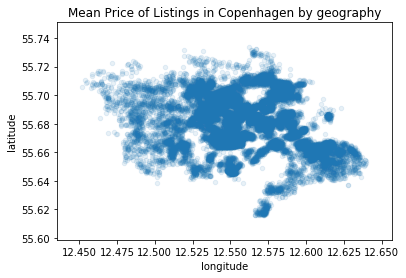

In [56]:
map_cph = strat_train_cph.copy()
map_cph.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)
plt.title("Mean Price of Listings in Copenhagen by geography")

In [57]:
# For Singapore 
## Since minimum class size is 1, hence neighbourhood_cleansed of 'pioneer' will  e dropped 

for train_index, test_index in split.split(sg_knn, sg_knn["neighbourhood_code"]):
    del sg_knn['neighbourhood_code']
    strat_train_sg = sg_knn.loc[train_index]
    strat_test_sg = sg_knn.loc[test_index]

# Average price per area for Copenhagen
strat_test_sg.groupby("neighbourhood_cleansed")['price'].mean()

C:\Users\Seng Jing Yi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys


neighbourhood_cleansed
Ang Mo Kio                  89.538462
Bedok                      136.065574
Bishan                     113.500000
Bukit Batok                101.625000
Bukit Merah                144.531646
Bukit Panjang              103.714286
Bukit Timah                116.863636
Central Water Catchment    228.142857
Choa Chu Kang               63.500000
Clementi                   218.518519
Downtown Core              193.020408
Geylang                    150.268156
Hougang                     89.285714
Jurong East                143.285714
Jurong West                 66.235294
Kallang                    134.327660
Mandai                      35.000000
Marina South               420.000000
Marine Parade              151.100000
Museum                     184.636364
Newton                     182.600000
Novena                     161.133333
Orchard                    310.111111
Outram                     155.000000
Pasir Ris                   48.583333
Punggol                    

Text(0.5,1,'Mean Price of Listings in Singapore by geography')

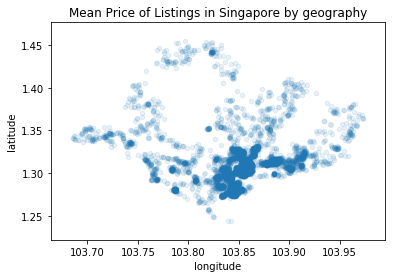

In [58]:
map_sg = strat_train_sg.copy()
map_sg.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)
plt.title("Mean Price of Listings in Singapore by geography")

In [59]:
## Building univariate KNN Model 
fixed_acc = 3

# For Copenhagen
cph_knnr = price_filtered_cph.copy()
cph_knnr.head()

,id,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_response_time,host_since,cancellation_policy,neighbourhood_cleansed,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,6983,373.0,Copenhagen,12.54571,55.68798,96.0,168,2,0.0,34.0,2,1.0,1.0,1.0,apartment,Private room,0,0,0,1.0,2009-05-12,2,Nrrebro,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,26057,2397.0,Copenhagen,12.57459,55.69163,98.0,50,3,5000.0,1100.0,6,1.5,4.0,4.0,house,Entire home/apt,333,0,0,2.0,2010-04-17,2,Indre By,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26473,3103.0,Copenhagen,12.57698,55.67590,90.0,292,3,3736.0,523.0,12,2.5,6.0,7.0,house,Entire home/apt,81,1,0,4.0,2010-04-22,2,Indre By,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,29118,801.0,Copenhagen,12.55430,55.67069,98.0,22,7,0.0,300.0,2,1.0,1.0,1.0,apartment,Entire home/apt,26,0,0,2.0,2010-05-15,2,Vesterbro-Kongens Enghave,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29618,862.0,Copenhagen,12.56945,55.69375,94.0,90,7,0.0,75.0,4,1.0,3.0,3.0,apartment,Entire home/apt,0,1,0,0.0,2010-05-18,2,sterbro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
## Creating new measure of 'distance' for knn regression
cph_knnr['distance'] = np.abs(cph_knnr.accommodates - fixed_acc)
cph_knnr.distance.value_counts().sort_index()

0      3804
1     18420
2      3044
3      2018
4       344
5       403
6        79
7        82
8        10
9        26
11        3
12        1
13        2
Name: distance, dtype: int64

In [61]:
## Splitting dataset into a sample
cph_knnr_sub = cph_knnr.sample(frac=1,random_state=0)
cph_knnr_sub = cph_knnr_sub.sort_values('distance')
cph_knnr_sub.price.head()

9415      550.0
20719     699.0
4821      703.0
21443    1100.0
4859      437.0
Name: price, dtype: float64

In [62]:
### Predicting the price of a 3-person listing based on mean of 5 similar listing
mean_price = cph_knnr_sub.price.iloc[:5].mean()
print("Mean Price of 3-person Listing: ", mean_price)

Mean Price of 3-person Listing:  697.8


In [176]:
### Repeat this model for other features: 

X_cph = cph_knnr.drop('price', axis = 1)
y_cph = cph_knnr['price']

train, test = train_test_split(cph_knnr, test_size = 0.3, random_state = 42)


def predict_price_knn(new_listing_value, feature_column): 
    temp_df = train
    temp_df['distance'] = np.abs(cph_knnr[feature_column] - new_listing_value)
    temp_df = temp_df.sort_values('distance')
    knn_5 = temp_df.price.iloc[:5]
    predicted_price = knn_5.mean()
    return(predicted_price)

train.y_pred = train.accommodates.apply(predict_price_knn, feature_column = 'accommodates')

C:\Users\Seng Jing Yi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Seng Jing Yi\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


In [182]:
## Defining scoring functions

def MAE(y_true, y_pred): 
    return mean_absolute_error(y_true, y_pred)

def RMSE(y_true, y_pred): 
    return (mean_squared_error(y_true, y_pred))**0.5


In [ ]:
### Test for other variables - beds, number_of_reviews, bathrooms

for feature in ['accommodates','beds','number_of_reviews']:
    train.y_pred = train.accommodates.apply(predict_price_knn,feature_column=feature)
    mae = MAE(train.price, y_pred)
    rmse = RMSE(train.price, y_pred)
    print("MAE for the {} column: {}".format(feature,mae))
    print("RMSE for the {} column: {}".format(feature,rmse))

In [183]:
# For Singapore
# Repeat with a change in dataset 
sg_knnr = price_filtered_sg.copy()

sg_knnr['distance'] = np.abs(sg_knnr.accommodates - fixed_acc)
sg_knnr.distance.value_counts().sort_index()

sg_knnr_sub = sg_knnr.sample(frac=1,random_state=0)
sg_knnr_sub = sg_knnr_sub.sort_values('distance')

In [ ]:
X_sg = sg_knnr.drop('price', axis = 1)
y_sg = sg_knnr['price']

train, test = train_test_split(sg_knnr, test_size = 0.3, random_state = 42)
train.y_pred = train.accommodates.apply(predict_price_knn, feature_column = 'accommodates')

for feature in ['accommodates','beds','number_of_reviews']:
    train.y_pred = train.accommodates.apply(predict_price_knn,feature_column=feature)
    mae = MAE(train.price, y_pred)
    rmse = RMSE(train.price, y_pred)
    print("MAE for the {} column: {}".format(feature,mae))
    print("RMSE for the {} column: {}".format(feature,rmse))

##### Unsupervised Learning - Clustering with Kmeans
1. Consider how much variance is explained by each individual component in the cleaned dataset
2. Determine the number of significant variables 
3. Use determined no of variables to perform K means clustering
4. Plot PCA plot

In [71]:
cph_cluster = price_filtered_cph.copy()
sg_cluster = price_filtered_sg.copy

## Drop irrelevant columns
cols_to_drop = ['id', 'city', 'review_scores_rating', 'number_of_reviews', 'availability_365', 'host_since','neighbourhood_cleansed']
cph_cluster = price_filtered_cph.drop(['id', 'city', 'review_scores_rating', 'number_of_reviews', 'availability_365', 'host_since','neighbourhood_cleansed'], axis = 1)
sg_cluster = price_filtered_sg.drop(['id', 'city', 'review_scores_rating', 'number_of_reviews', 'availability_365', 'host_since','neighbourhood_cleansed'], axis = 1)

In [72]:
## Convert all categorical variables into dummy variables
cph_cluster = pd.get_dummies(cph_cluster, columns=["property_type", 'room_type'])
sg_cluster = pd.get_dummies(sg_cluster, columns=["property_type", 'room_type'])

## Drop any rows with null values
cph_cluster = cph_cluster.dropna()
sg_cluster = sg_cluster.dropna()

In [73]:
## Scale the data to prevent unwanted distortion
cph_scaled = StandardScaler().fit_transform(cph_cluster)
sg_scaled = StandardScaler().fit_transform(sg_cluster)

In [74]:
## Modelling 
np.random.seed(123)
n = 8 # set number of clusters 
kmeans_cph = KMeans(n_clusters = n, random_state = 0).fit(cph_scaled)
kmeans_sg = KMeans(n_clusters = n, random_state = 0).fit(sg_scaled)


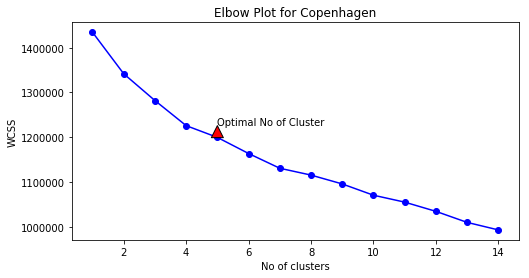

In [75]:
## Determining ideal number of clusters
# For Copenhagen
elbow = [KMeans(n_clusters = n, random_state = 0 ). fit(cph_scaled) for n in range(1,15)]
inertias = [model.inertia_ for model in elbow]

plt.figure(figsize = (8,4))
plt.plot(range(1,15), inertias, "bo-")
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.title("Elbow Plot for Copenhagen")

## Pinpoint Ideal No of Cluster = 7
plt.annotate('Optimal No of Cluster', xy=(5, inertias[3]), arrowprops = dict(facecolor = 'red', shrink = 0.01))
plt.show()

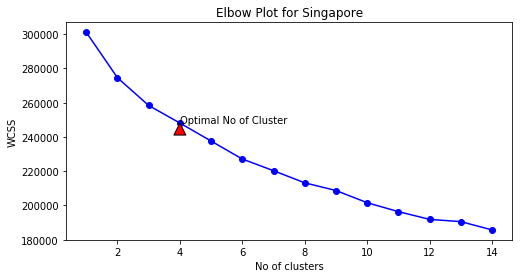

In [76]:
# For Singapore
elbow = [KMeans(n_clusters = n, random_state = 0 ). fit(sg_scaled) for n in range(1,15)]
inertias = [model.inertia_ for model in elbow]

plt.figure(figsize = (8,4))
plt.plot(range(1,15), inertias, "bo-")
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.title("Elbow Plot for Singapore")

## Pinpoint Ideal No of Cluster = 4
plt.annotate('Optimal No of Cluster', xy=(4, inertias[3]), arrowprops = dict(facecolor = 'red', shrink = 0.01))
plt.show()

In [77]:
## Re-building the model with optimal number of clusters
# For Copenhagen
np.random.seed(123)
n = 5 # set number of clusters 
kmeans_cph = KMeans(n_clusters = n, random_state = 0).fit(cph_scaled)

# For Singapore
np.random.seed(123)
n = 4 # set number of clusters 
kmeans_sg = KMeans(n_clusters = n, random_state = 0).fit(sg_scaled)

Text(0.5,1,'Scatter plot of Listings in Copenhagen')

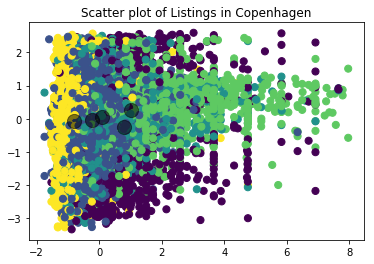

In [78]:
## Interpreting Results Obtained
# For Copenhagen
cph_centers = kmeans_cph.cluster_centers_
y_cph = kmeans_cph.predict(cph_scaled)

plt.scatter(cph_scaled[:, 0], cph_scaled[:, 1], c=y_cph, s=50, cmap='viridis')
plt.scatter(cph_centers[:, 0], cph_centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Scatter plot of Listings in Copenhagen')

Text(0.5,1,'Scatter plot of Listings in Singapore')

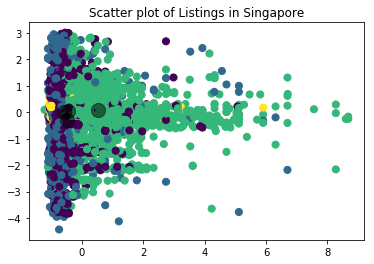

In [79]:
# For Singapore
sg_centers = kmeans_sg.cluster_centers_
y_sg = kmeans_sg.predict(sg_scaled)

plt.scatter(sg_scaled[:, 0], sg_scaled[:, 1], c=y_sg, s=50, cmap='viridis')
plt.scatter(sg_centers[:, 0], sg_centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Scatter plot of Listings in Singapore')

In [80]:
## Appending identified clusters to original dataframe
cph_result = cph_cluster.copy()
cph_result.insert(0, 'Cluster Label', kmeans_cph.labels_)

sg_result = sg_cluster.copy()
sg_result.insert(0, 'Cluster Label', kmeans_sg.labels_)

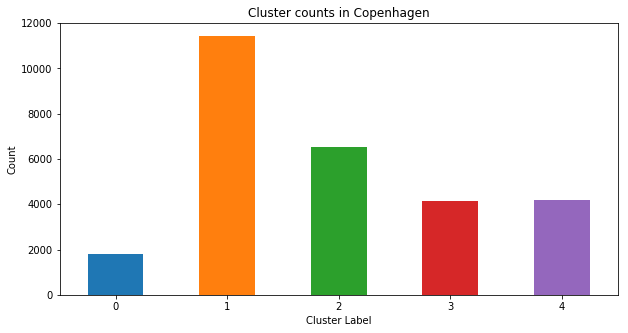

In [81]:
## Plot number of rows in each cluster
# For Copenhagen
cph_result.groupby('Cluster Label')['price'].count().plot(kind = 'bar', figsize = (10,5))
plt.xlabel('Cluster Label')
plt.xticks(rotation = 0)
plt.ylabel('Count')
plt.title('Cluster counts in Copenhagen')
plt.show()

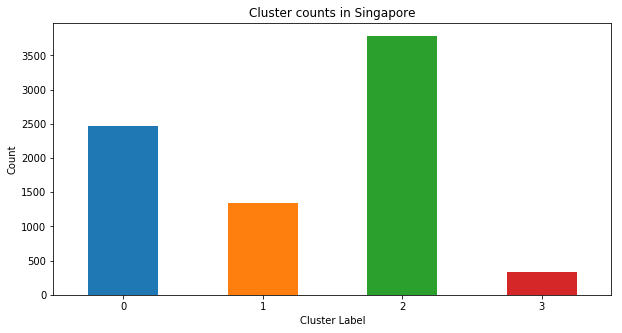

In [82]:
# For Singapore
sg_result.groupby('Cluster Label')['price'].count().plot(kind = 'bar', figsize = (10,5))
plt.xlabel('Cluster Label')
plt.xticks(rotation = 0)
plt.ylabel('Count')
plt.title('Cluster counts in Singapore')
plt.show()

In [83]:
scal = StandardScaler()
cph_scaled = scal.fit_transform(cph_cluster)
cph_centroids = scal.inverse_transform(kmeans_cph.cluster_centers_)
cph_centroids_df = pd.DataFrame(cph_centroids, columns = list(cph_cluster.keys()))
cph_centroids_df

,price,longitude,latitude,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,host_identity_verified,host_is_superhost,host_response_time,cancellation_policy,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable,property_type_apartment,property_type_hostel,property_type_hotel,property_type_house,property_type_other,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1171.578073,12.550188,55.673243,4.403101,926.751384,344.591362,5.779623,1.553710,3.090808,4.124031,0.397564,0.067553,1.208195,2.366002,0.079181,0.038760,0.085825,0.266888,0.325581,0.053710,0.307309,0.029900,0.875969,0.313400,0.434662,0.945736,0.006091,0.014396,0.779070,0.897010,0.377630,0.136213,0.028239,0.981728,0.080842,0.220377,0.405316,0.065338,0.173311,0.005537,0.028793,0.017165,0.004430,5.963112e-18,-2.949030e-17,9.861573e-01,0.006645,9.772979e-01,-8.023096e-18,2.270210e-02,-1.821460e-17
1,694.669697,12.556068,55.683235,3.864137,399.160080,139.184910,2.795156,1.003235,1.225651,1.572740,0.359591,0.036457,0.734044,2.538031,0.043364,0.010142,0.005770,0.001049,0.015212,0.013726,0.100717,0.035059,0.680713,0.037069,0.103165,0.598619,0.129830,0.007694,0.402780,0.341668,0.011103,0.138661,0.004721,0.949030,0.017223,0.075625,0.221717,0.031999,0.028676,0.036195,0.015212,0.008655,0.997552,4.087442e-17,2.101184e-16,7.868508e-04,0.001399,1.000000e+00,-1.404042e-16,8.965051e-15,2.059984e-16
2,852.509777,12.559015,55.680391,3.456462,860.569355,244.275588,3.275588,1.035365,1.441338,1.854415,0.426520,0.205316,1.909716,2.257867,0.050718,0.011916,0.087993,0.220440,0.533456,0.112435,0.728384,0.025359,0.780324,0.642530,0.972502,0.890467,0.190956,0.017110,0.486404,0.798656,0.420104,0.344332,0.010694,0.983960,0.189123,0.100214,0.305988,0.039566,0.164986,0.030095,0.026887,0.009471,0.992820,8.565197e-18,9.822872e-17,2.749771e-03,0.001528,9.760159e-01,4.582951e-04,2.337305e-02,1.527650e-04
3,1270.535259,12.565807,55.678593,3.429362,1752.301805,429.162936,5.004091,1.140674,2.452708,3.507341,0.347533,0.062335,1.376655,2.194705,0.059928,0.020939,0.029603,0.012515,0.094826,0.031047,0.142238,0.021420,0.864260,0.164140,0.209627,0.921781,0.250301,0.015403,0.638748,0.389410,0.031769,0.174248,0.016847,0.990132,0.050542,0.113598,0.204332,0.043081,0.056077,0.017088,0.077497,0.014922,0.923466,-3.089976e-17,-5.204170e-17,5.745404e-15,0.001685,9.971119e-01,4.813478e-04,2.166065e-03,2.406739e-04
4,429.704491,12.555575,55.680197,3.467272,423.113951,81.422838,1.938605,1.044553,1.000478,1.190158,0.380076,0.151457,1.407788,2.538462,0.042523,0.019350,0.006450,0.017678,0.087434,0.049928,0.247253,0.071190,0.380554,0.150979,0.240564,0.701147,0.187052,0.009078,0.234114,0.422121,0.093645,0.209508,0.010272,0.960105,0.060201,0.088390,0.086001,0.028667,0.038700,0.085762,0.025084,0.022456,0.913760,4.061156e-03,6.688963e-03,7.214525e-02,0.002389,-1.110223e-14,4.777831e-03,9.784998e-01,1.672241e-02


In [84]:
scal = StandardScaler()
sg_scaled = scal.fit_transform(sg_cluster)
sg_centroids = scal.inverse_transform(kmeans_sg.cluster_centers_)
sg_centroids_df = pd.DataFrame(sg_centroids, columns = list(sg_cluster.keys()))
sg_centroids_df


,price,longitude,latitude,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,host_identity_verified,host_is_superhost,host_response_time,cancellation_policy,air_con,check_in,cooking,childcare,entertainment,luxury,nature,clothing,accessibility,safety,internet,comfort,essentials,pet_friendly,smoking,property_type_apartment,property_type_hostel,property_type_hotel,property_type_house,property_type_other,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,95.410163,103.850343,1.310798,17.089431,97.067073,17.507317,2.137398,1.440650,0.970325,1.321138,0.317480,0.171138,3.422358,2.090244,0.996748,0.698374,0.824797,0.255285,0.935366,0.394309,0.157317,0.926016,0.812195,0.959756,0.996341,0.426829,1.000000,0.062195,0.065447,0.617886,1.304512e-15,0.151220,0.152439,0.000813,4.756098e-02,0.073984,0.862602,1.585366e-02
1,94.211624,103.836170,1.336153,34.230253,76.389717,11.277198,2.038748,1.160581,1.035768,1.297317,0.245902,0.014903,0.915052,2.732489,0.859165,0.280179,0.743666,0.231744,0.675857,0.529806,0.032042,0.830104,0.749627,0.605812,0.885246,0.054396,0.837556,0.114754,0.145306,0.786885,-5.828671e-16,0.007452,0.169151,0.032787,1.229508e-01,0.002235,0.795827,7.898659e-02
2,218.768966,103.852551,1.308486,15.279672,267.257203,44.562252,4.523130,1.564103,1.728258,2.323024,0.163362,0.265662,3.264605,2.060005,0.997885,0.439863,0.993127,0.376685,0.986254,0.754163,0.209093,0.990484,0.898758,0.766323,0.989955,0.447793,0.996035,0.357124,0.172614,0.793814,2.095546e-15,0.001057,0.041237,0.002643,9.524187e-01,0.035686,0.011895,2.636780e-15
3,78.723529,103.848648,1.297344,2.364706,15.994118,2.064706,4.779412,3.513235,1.032353,6.376471,0.123529,0.011765,3.752941,2.091176,0.900000,0.526471,0.300000,0.285294,0.711765,0.144118,0.073529,0.841176,0.364706,0.897059,0.961765,0.205882,0.952941,0.002941,0.002941,0.002941,9.235294e-01,0.064706,0.002941,0.005882,1.720846e-15,0.561765,0.100000,3.382353e-01


#### Supervised Learning - Linear Regression

In [85]:
## Pre-processing dataset for linear regression
lin_reg = LinearRegression()

cph_lr = price_filtered_cph.copy()
sg_lr = price_filtered_sg.copy()

## Drop irrelevant columns
cols_to_drop = ['city', 'id', 'availability_365', 'host_since']
cph_lr = cph_lr.drop(cols_to_drop, axis = 1)
sg_lr = sg_lr.drop(cols_to_drop, axis = 1)

## Convert catergorical variables into dummy variables with one-hot-encoding
cols_to_convert = ['property_type', 'room_type', 'neighbourhood_cleansed']
cph_lr = pd.get_dummies(cph_lr, columns = cols_to_convert)
sg_lr = pd.get_dummies(sg_lr, columns = cols_to_convert)

### Drop any rows with null variables 
cph_lr = cph_lr.dropna(subset = ['beds','bathrooms', 'accommodates', 'bedrooms'])
sg_lr = sg_lr.dropna(subset = ['beds','bathrooms', 'accommodates', 'bedrooms'])

C:\Users\Seng Jing Yi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Skewness: 2.287464
Kurtosis: 8.989442


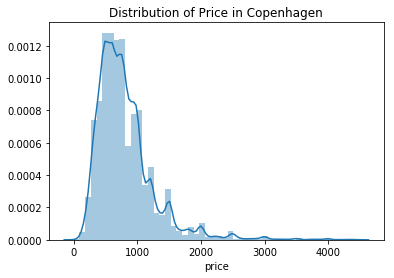

In [86]:
## Ensure that the target variable is normally distributed with normal kurtosis and skewness
sns.distplot(cph_lr['price'], kde=True,).set_title('Distribution of Price in Copenhagen')
print("Skewness: %f" % cph_lr['price'].skew())
print("Kurtosis: %f" % cph_lr['price'].kurt())

## What to do when it is not normally distributed 
## Highly skewed and high kurtosis 

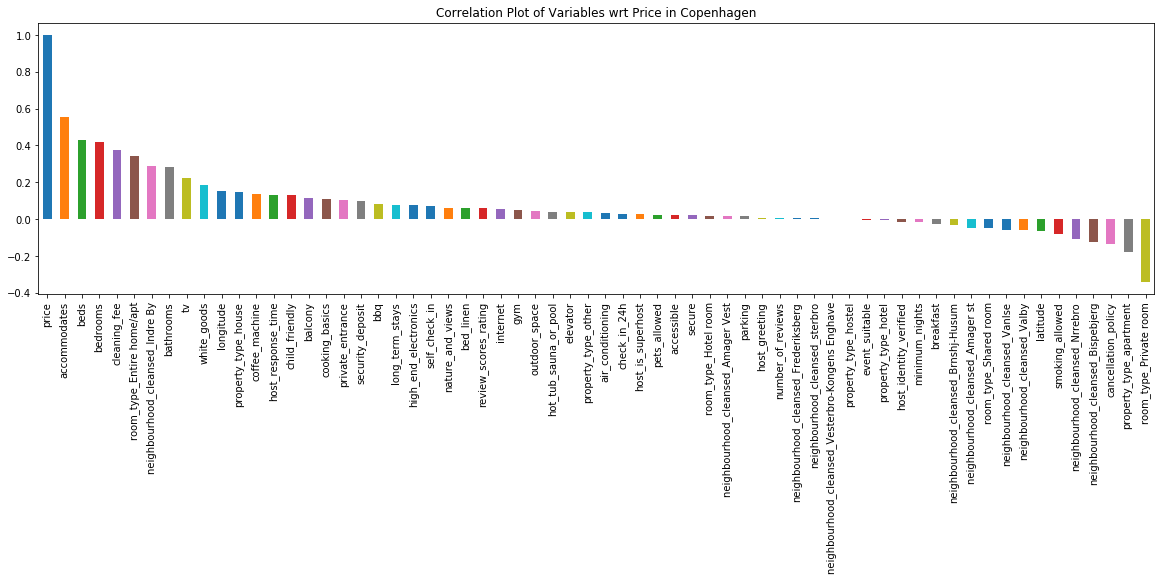

price                                               1.000000
accommodates                                        0.553094
beds                                                0.431062
bedrooms                                            0.421474
cleaning_fee                                        0.373143
room_type_Entire home/apt                           0.344146
neighbourhood_cleansed_Indre By                     0.289923
bathrooms                                           0.284557
tv                                                  0.222748
white_goods                                         0.187008
longitude                                           0.153712
property_type_house                                 0.149932
coffee_machine                                      0.136121
host_response_time                                  0.132189
child_friendly                                      0.131659
balcony                                             0.116764
cooking_basics          

In [87]:
## Check the correlation of other variables with price 
corr_cph = cph_lr.corr()['price']
corr_cph = corr_cph.sort_values(ascending = False)

## Plot diagram
corr_cph.plot(kind = 'bar', figsize = (20,5))
plt.title("Correlation Plot of Variables wrt Price in Copenhagen")
plt.show()
corr_cph

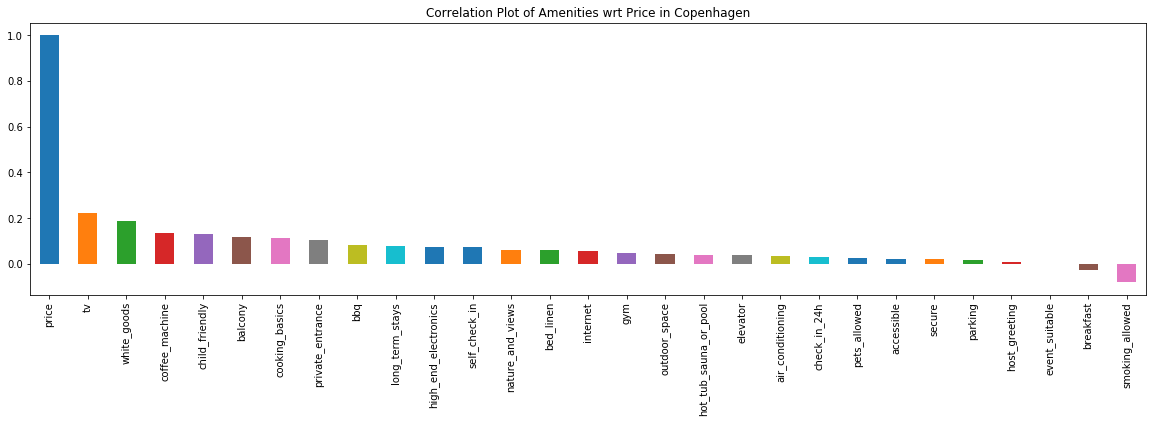

price                    1.000000
tv                       0.222748
white_goods              0.187008
coffee_machine           0.136121
child_friendly           0.131659
balcony                  0.116764
cooking_basics           0.111330
private_entrance         0.102860
bbq                      0.084467
long_term_stays          0.078894
high_end_electronics     0.075173
self_check_in            0.073583
nature_and_views         0.061110
bed_linen                0.060636
internet                 0.057507
gym                      0.047071
outdoor_space            0.044385
hot_tub_sauna_or_pool    0.040469
elevator                 0.039774
air_conditioning         0.034519
check_in_24h             0.030320
pets_allowed             0.024699
accessible               0.022831
secure                   0.020317
parking                  0.015222
host_greeting            0.008320
event_suitable          -0.002066
breakfast               -0.027539
smoking_allowed         -0.080153
Name: price, d

In [88]:
## Narrowing down to Amenities
cph_amenities = cph_lr.drop(columns =['longitude', 'latitude', 'review_scores_rating',
       'number_of_reviews', 'minimum_nights', 'security_deposit',
       'cleaning_fee', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'host_identity_verified', 'host_is_superhost', 'host_response_time',
       'cancellation_policy', 'property_type_apartment', 'property_type_hostel',
       'property_type_hotel', 'property_type_house', 'property_type_other',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room',
       'neighbourhood_cleansed_Amager Vest',
       'neighbourhood_cleansed_Amager st', 'neighbourhood_cleansed_Bispebjerg',
       'neighbourhood_cleansed_Brnshj-Husum',
       'neighbourhood_cleansed_Frederiksberg',
       'neighbourhood_cleansed_Indre By', 'neighbourhood_cleansed_Nrrebro',
       'neighbourhood_cleansed_Valby', 'neighbourhood_cleansed_Vanlse',
       'neighbourhood_cleansed_Vesterbro-Kongens Enghave',
       'neighbourhood_cleansed_sterbro'])

cph_amenities_corr = cph_amenities.corr()['price']
cph_amenities_corr = cph_amenities_corr.sort_values(ascending = False)

cph_amenities_corr.plot(kind = 'bar', figsize = (20,5))
plt.title("Correlation Plot of Amenities wrt Price in Copenhagen")
plt.show()
cph_amenities_corr

We selected the top 10 variables most highly correlated in magnitude, regardless of positive or negative. 

The variables are `accommodates`, `beds`, `bedrooms`, `cleaning_fee`, `room_type_Entire home/apt`,`room_type_Private_room`, `neighbourhood_cleansed_Indre By`, `bathrooms`, `tv`, `white_goods`

In [89]:
predictor = ['accommodates','beds','bedrooms', 'cleaning_fee', 'room_type_Entire home/apt', 'room_type_Private_room', 'neighbourhood_cleansed_Indre By', 'bathrooms', 'tv', 'white_goods']
X_cph = cph_lr.filter(predictor, axis = 1)
y_cph = cph_lr['price']


In [90]:
### Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X_cph, y_cph, test_size = 0.3, random_state = 42)

In [91]:
## Fit into the model
cph_lm = sm.OLS(y_train, X_train)
cph_fit = cph_lm.fit()
cph_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 1.391e+04
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        17:35:57   Log-Likelihood:            -1.4288e+05
No. Observations:               19691   AIC:                         2.858e+05
Df Residuals:                   19682   BIC:                         2.858e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
accommodates                       95.6918      2.635     36.315      0.000      90.527     100.857
beds                                4.4086      2.641      1.669      0.095      -0.769       9.586
bedrooms                           30.8157      2.799     11.011      0.000      25.330      36.301
cleaning_fee                        0.2737      0.011     25.874      0.000       0.253       0.294
room_type_Entire home/apt         182.7119      6.831     26.747      0.000     169.322     196.102
neighbourhood_cleansed_Indre By   336.5888      7.307     46.061      0.000     322.265     350.912
bathrooms                         110.7128      6.645     16.660      0.000      97.687     123.738
tv                                 47.3225      5.631      8.404      0.000      36.285      58.360
white_goods                        40.0958      5.687      7.051      0.000      28.949      51.242
==============================================================================
Omnibus:                     9359.714   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97722.120
Skew:                           2.030   Prob(JB):                         0.00
Kurtosis:                      13.130   Cond. No.                     1.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Key Highlights: 
- Adjusted R square = 0.864 (Tells you how much variance in `price` is explained by the predictors in `cph_lm`)
- Log-likelihood = close to 0 (How probable this model will perform on new data)
- Durbin Watson = 1.996 (Close to 2 - any autocorrelation)
- High condition number indicating strong multicollinearity 


In [92]:
## Getting Variance Inflation Factors (To check for multicollinearity)
vif_cph = pd.DataFrame()
vif_cph['VIF Factor'] = [variance_inflation_factor(X_cph.values, i) for i in range (X_cph.shape[1])]
vif_cph['Features'] = X_cph.columns
vif_cph

,VIF Factor,Features
0,16.255345,accommodates
1,7.349656,beds
2,5.757302,bedrooms
3,2.016757,cleaning_fee
4,6.596807,room_type_Entire home/apt
5,1.173103,neighbourhood_cleansed_Indre By
6,8.843097,bathrooms
7,3.710686,tv
8,4.069113,white_goods


There is high multicollinearity between `accommodates`, `bathrooms` and `beds`. Where linear regression works best with independent predictors, we can minimise the problem of multi-collinearity by removing highly correlated features

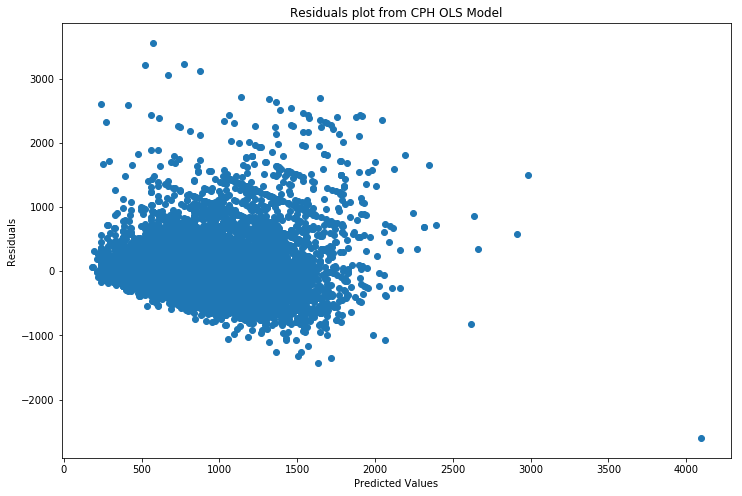

In [93]:
## Evaluating the model by looking at the residuals
plt.figure(figsize=(12,8))
plt.scatter(cph_fit.predict(), cph_fit.resid); # print resids vs predictions
plt.title("Residuals plot from CPH OLS Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

Ideally, the residuals should be normally distributed based on the assumptions of a linear regression. However, although this model gives a good fit, it is skewed upwards, indicating that possible biasness may have been introduced. This calls for subsequent regularisation to standardise all the features with LassoCV. 

https://towardsdatascience.com/airbnb-price-prediction-using-linear-regression-scikit-learn-and-statsmodels-6e1fc2bd51a6

In [94]:
y_pred = cph_fit.predict(X_train)

print("Mean Absolute Error: ", MAE(y_train, y_pred))
print("Root Mean Squared Error", RMSE(y_train, y_pred))

Mean Absolute Error:  232.178039039011
Root Mean Squared Error 342.77003673870877


In [95]:
y_pred2 = cph_fit.predict(X_test)

print("Mean Absolute Error: ", MAE(y_test, y_pred2))
print('R2 Score: ', r2_score(y_test, y_pred2))
print("Root Mean Squared Error", (mean_squared_error(y_test,y_pred2))**0.5)

Mean Absolute Error:  232.84544044823494
R2 Score:  0.43500202337298877
Root Mean Squared Error 349.8939494072621


Skewness: 2.596765
Kurtosis: 11.012511


C:\Users\Seng Jing Yi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


price                                      1.000000
accommodates                               0.545425
bedrooms                                   0.531203
room_type_Entire home/apt                  0.437680
cleaning_fee                               0.315255
beds                                       0.259458
luxury                                     0.213003
bathrooms                                  0.183280
neighbourhood_cleansed_Orchard             0.166438
childcare                                  0.159637
pet_friendly                               0.151698
entertainment                              0.149183
cooking                                    0.121409
nature                                     0.107896
neighbourhood_cleansed_Downtown Core       0.101418
host_response_time                         0.091100
neighbourhood_cleansed_Southern Islands    0.089314
accessibility                              0.084129
smoking                                    0.078761
security_dep

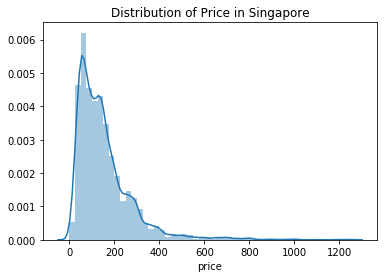

In [96]:
# For Singapore
sns.distplot(sg_lr['price'], kde=True,).set_title('Distribution of Price in Singapore')
print("Skewness: %f" % sg_lr['price'].skew()) ##
print("Kurtosis: %f" % sg_lr['price'].kurt())

corr_sg = sg_lr.corr()['price']
corr_sg = corr_sg.sort_values(ascending = False)
corr_sg

#corr_sg.plot(kind = 'bar', figsize = (20,5))
#plt.title("Correlation Plot of Variables wrt Price in Singapore")

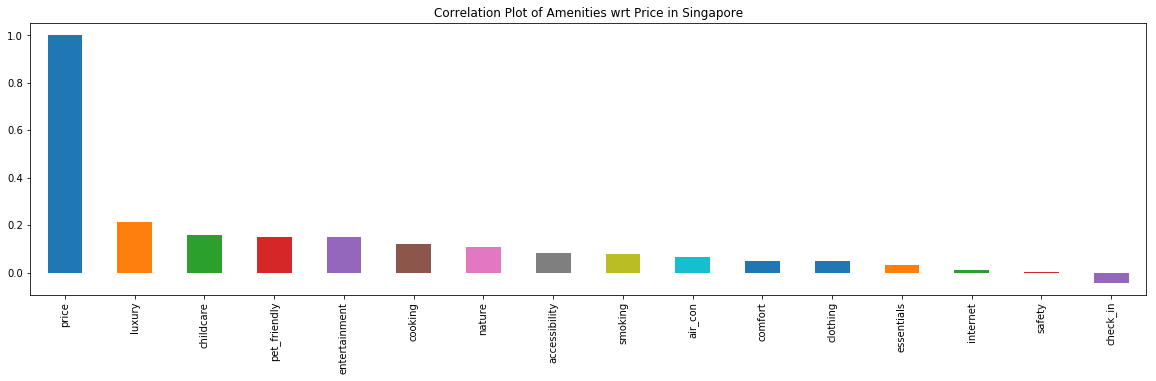

price            1.000000
luxury           0.213003
childcare        0.159637
pet_friendly     0.151698
entertainment    0.149183
cooking          0.121409
nature           0.107896
accessibility    0.084129
smoking          0.078761
air_con          0.065522
comfort          0.050922
clothing         0.049553
essentials       0.033936
internet         0.012439
safety           0.003359
check_in        -0.041800
Name: price, dtype: float64

In [97]:
## Narrowing down to Amenities
sg_amenities = sg_lr.drop(columns =['longitude', 'latitude', 'review_scores_rating',
       'number_of_reviews', 'minimum_nights', 'security_deposit',
       'cleaning_fee', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'host_identity_verified', 'host_is_superhost', 'host_response_time',
       'cancellation_policy', 'property_type_apartment', 'property_type_hostel',
       'property_type_hotel', 'property_type_house', 'property_type_other',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room',
       'neighbourhood_cleansed_Ang Mo Kio', 'neighbourhood_cleansed_Bedok',
       'neighbourhood_cleansed_Bishan', 'neighbourhood_cleansed_Bukit Batok',
       'neighbourhood_cleansed_Bukit Merah',
       'neighbourhood_cleansed_Bukit Panjang',
       'neighbourhood_cleansed_Bukit Timah',
       'neighbourhood_cleansed_Central Water Catchment',
       'neighbourhood_cleansed_Choa Chu Kang',
       'neighbourhood_cleansed_Clementi',
       'neighbourhood_cleansed_Downtown Core',
       'neighbourhood_cleansed_Geylang', 'neighbourhood_cleansed_Hougang',
       'neighbourhood_cleansed_Jurong East',
       'neighbourhood_cleansed_Jurong West', 'neighbourhood_cleansed_Kallang',
       'neighbourhood_cleansed_Mandai', 'neighbourhood_cleansed_Marina South',
       'neighbourhood_cleansed_Marine Parade', 'neighbourhood_cleansed_Museum',
       'neighbourhood_cleansed_Newton', 'neighbourhood_cleansed_Novena',
       'neighbourhood_cleansed_Orchard', 'neighbourhood_cleansed_Outram',
       'neighbourhood_cleansed_Pasir Ris', 'neighbourhood_cleansed_Pioneer',
       'neighbourhood_cleansed_Punggol', 'neighbourhood_cleansed_Queenstown',
       'neighbourhood_cleansed_River Valley', 'neighbourhood_cleansed_Rochor',
       'neighbourhood_cleansed_Sembawang', 'neighbourhood_cleansed_Sengkang',
       'neighbourhood_cleansed_Serangoon',
       'neighbourhood_cleansed_Singapore River',
       'neighbourhood_cleansed_Southern Islands',
       'neighbourhood_cleansed_Sungei Kadut',
       'neighbourhood_cleansed_Tampines', 'neighbourhood_cleansed_Tanglin',
       'neighbourhood_cleansed_Toa Payoh',
       'neighbourhood_cleansed_Western Water Catchment',
       'neighbourhood_cleansed_Woodlands', 'neighbourhood_cleansed_Yishun'])

sg_amenities_corr = sg_amenities.corr()['price']
sg_amenities_corr = sg_amenities_corr.sort_values(ascending = False)

sg_amenities_corr.plot(kind = 'bar', figsize = (20,5))
plt.title("Correlation Plot of Amenities wrt Price in Singapore")
plt.show()
sg_amenities_corr

In [98]:
predictor = ['accommodates','beds','bedrooms', 'cleaning_fee', 'room_type_Entire home/apt', 'room_type_Private_room', 'luxury', 'bathrooms', 'neighbourhood_cleansed_Orchard', 'latitude ']
X_sg = sg_lr.filter(predictor, axis = 1)
y_sg = sg_lr['price']

### Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X_sg, y_sg, test_size = 0.3, random_state = 42)

## Building the model
sg_lm = sm.OLS(y_train, X_train)
sg_fit = sg_lm.fit()
sg_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     2499.
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        17:35:59   Log-Likelihood:                -32964.
No. Observations:                5547   AIC:                         6.594e+04
Df Residuals:                    5539   BIC:                         6.600e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
accommodates                      16.4480      0.836     19.684      0.000      14.810      18.086
beds                              -3.8420      0.700     -5.491      0.000      -5.214      -2.470
bedrooms                          33.8841      1.765     19.195      0.000      30.423      37.345
cleaning_fee                       0.4017      0.035     11.451      0.000       0.333       0.470
room_type_Entire home/apt         47.7697      2.913     16.401      0.000      42.060      53.479
luxury                            27.7464      2.435     11.396      0.000      22.973      32.519
bathrooms                          1.8647      1.128      1.653      0.098      -0.346       4.076
neighbourhood_cleansed_Orchard   150.2275      9.498     15.817      0.000     131.608     168.847
==============================================================================
Omnibus:                     4074.279   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           115928.198
Skew:                           3.206   Prob(JB):                         0.00
Kurtosis:                      24.458   Cond. No.                         369.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
y_pred = sg_fit.predict(X_train)

print("Mean Absolute Error: ", MAE(y_train, y_pred))
print("Root Mean Squared Error", RMSE(y_train, y_pred))
    

Mean Absolute Error:  54.56941168966861
Root Mean Squared Error 92.17450888917888


In [100]:
y_pred2 = sg_fit.predict(X_test)
print("Mean Absolute Error: ", MAE(y_test, y_pred2))
print('R2 Score: ', r2_score(y_test, y_pred2))
print("Root Mean Squared Error", (mean_squared_error(y_test,y_pred2))**0.5)

Mean Absolute Error:  54.68025086669358
R2 Score:  0.40699191816021374
Root Mean Squared Error 99.71786045467377


#### Supervised Learning - Random Forest Regressor

In [101]:
cph_rf = price_filtered_cph.copy()
sg_rf = price_filtered_sg.copy()

## Drop Columns irrelevant to Price
col_to_drop = ['id','city', 'longitude', 'latitude', 'host_since']
cph_rf = cph_rf.drop(col_to_drop, axis = 1)
sg_rf = sg_rf.drop(col_to_drop, axis = 1)

## Convert catergorical variables into dummy variables with one-hot-encoding
cols_to_convert = ['property_type', 'room_type', 'neighbourhood_cleansed']
cph_rf = pd.get_dummies(cph_rf, columns = cols_to_convert)
sg_rf = pd.get_dummies(sg_rf, columns = cols_to_convert)

### Drop any rows with null variables 
cph_rf = cph_rf.dropna()
sg_rf = sg_rf.dropna()


In [102]:
# For Copenhagen
## Separating X & Y
X_cph = cph_rf.drop('price', axis = 1)
y_cph = cph_rf['price']

## Split train and test set
x_train, x_test, y_train, y_test = train_test_split(X_cph, y_cph, test_size = 0.3, random_state = 123)

Text(0.5,1,'Top 10 Feature Importance for Copenhagen')

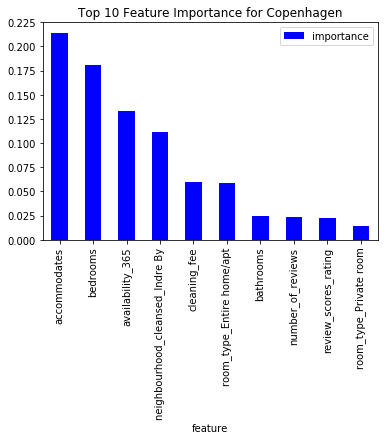

In [103]:
## Building the Model
clf = RandomForestRegressor(max_depth=10, n_estimators=100)

## Training the regressor
cph_fit = clf.fit(x_train, y_train)

## Plot variable importance for top 10 predictors
importances = cph_fit.feature_importances_
feat_names = X_cph.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar',color='blue')
plt.title("Top 10 Feature Importance for Copenhagen")

In [104]:
## Predicting values with training set
y_pred = cph_fit.predict(x_train)

# Evaluating the Model
print("R^2 value using score fn: %.3f" % clf.score(x_train,y_train))
print("Mean Absolute Error: ", MAE(y_train, y_pred))
print("Mean Squared Error : %0.3f" % mean_squared_error(y_train,y_pred))
print("Root Mean Squared Error : %0.3f" % (mean_squared_error(y_train,y_pred))**0.5)

R^2 value using score fn: 0.740
Mean Absolute Error:  168.1514694005109
Mean Squared Error : 52326.088
Root Mean Squared Error : 228.749


In [105]:
## Testing on test dataset 
y_pred = cph_fit.predict(x_test)
print("Test Data")
print("R^2 value using score fn: %.3f" % clf.score(x_test,y_test))
print("Mean Absolute Error: ", MAE(y_test, y_pred))
print("Mean Squared Error : %0.3f" % mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error : %0.3f" % (mean_squared_error(y_test,y_pred))**0.5)

Test Data
R^2 value using score fn: 0.581
Mean Absolute Error:  199.17056610064068
Mean Squared Error : 84641.946
Root Mean Squared Error : 290.933


Text(0.5,1,'Residuals for the RF Regressor in Copenhagen')

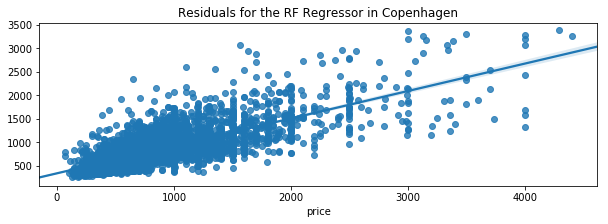

In [106]:
## Residual Plot
fig = plt.figure(figsize=(10,3))

sns.regplot((y_test),(y_pred))
plt.title("Residuals for the RF Regressor in Copenhagen")

- Noticeably lower R^2 for test data set
- Need further fine tuning 

Text(0.5,1,'Top 10 Feature Importance for Singapore')

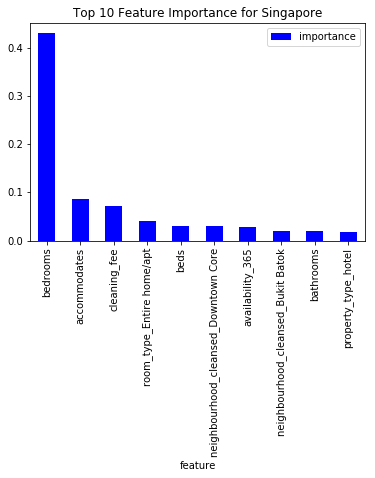

In [107]:
# For Singapore
## Separating X & Y
X_sg = sg_rf.drop('price', axis = 1)
y_sg = sg_rf['price']

## Split train and test set
x_train, x_test, y_train, y_test = train_test_split(X_sg, y_sg, test_size = 0.3, random_state = 123)

## Building the Model
clf = RandomForestRegressor(max_depth=10, n_estimators=100)

## Training the regressor
sg_fit = clf.fit(x_train, y_train)

## Plot variable importance for top 10 predictors
importances = sg_fit.feature_importances_
feat_names = X_sg.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar',color='blue')
plt.title("Top 10 Feature Importance for Singapore")

In [108]:
## Predicting values with training set
y_pred = sg_fit.predict(x_train)

# Evaluating the Model
print("R^2 value using score fn: %.3f" % clf.score(x_train,y_train))
print("Mean Absolute Error: ", MAE(y_train, y_pred))
print("Mean Squared Error : %0.3f" % mean_squared_error(y_train,y_pred))
print("Root Mean Squared Error : %0.3f" % (mean_squared_error(y_train,y_pred))**0.5)

R^2 value using score fn: 0.889
Mean Absolute Error:  24.938433735969006
Mean Squared Error : 1484.098
Root Mean Squared Error : 38.524


In [109]:
## Testing on test dataset 
y_pred = sg_fit.predict(x_test)
print("Test Data")
print("R^2 value using score fn: %.3f" % clf.score(x_test,y_test))
print("Mean Absolute Error: ", MAE(y_test, y_pred))
print("Mean Squared Error : %0.3f" % mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error : %0.3f" % (mean_squared_error(y_test,y_pred))**0.5)

Test Data
R^2 value using score fn: 0.647
Mean Absolute Error:  35.30068727725377
Mean Squared Error : 4686.442
Root Mean Squared Error : 68.458


Text(0.5,1,'Residuals for the RF Regressor in Singapore')

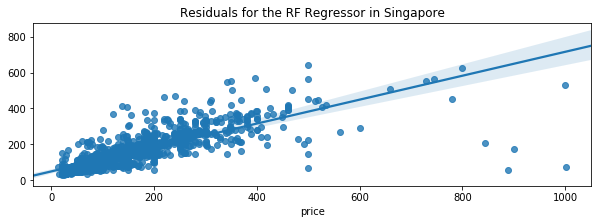

In [110]:
## Residual Plot
fig = plt.figure(figsize=(10,3))

sns.regplot((y_test),(y_pred))
plt.title("Residuals for the RF Regressor in Singapore")

### Improving the Model

- Feature Selection
- Cross Validation

#### Unsupervised Learning - Determining Ideal Number of Variables Used with PCA `explained_variance_ratio`

Text(0,0.5,'Cumulative Explained Variance')

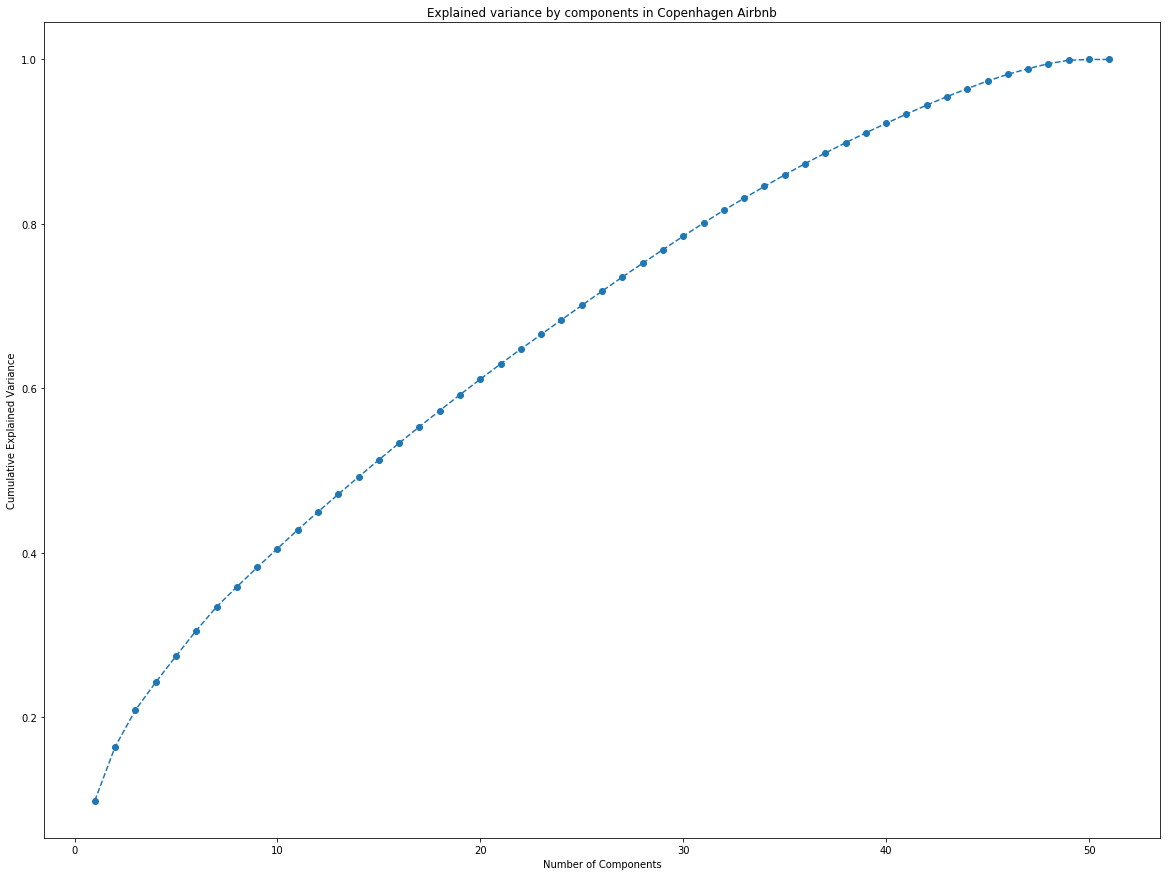

In [111]:
pca = PCA()

# For Copenhagen
pca_cph = pca.fit(cph_scaled)
pca_cph.explained_variance_ratio_

# Plot cumulative explained variance by components
plt.figure(figsize = (20,15))
plt.plot(range(1,52), pca_cph.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained variance by components in Copenhagen Airbnb')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

Text(0,0.5,'Cumulative Explained Variance')

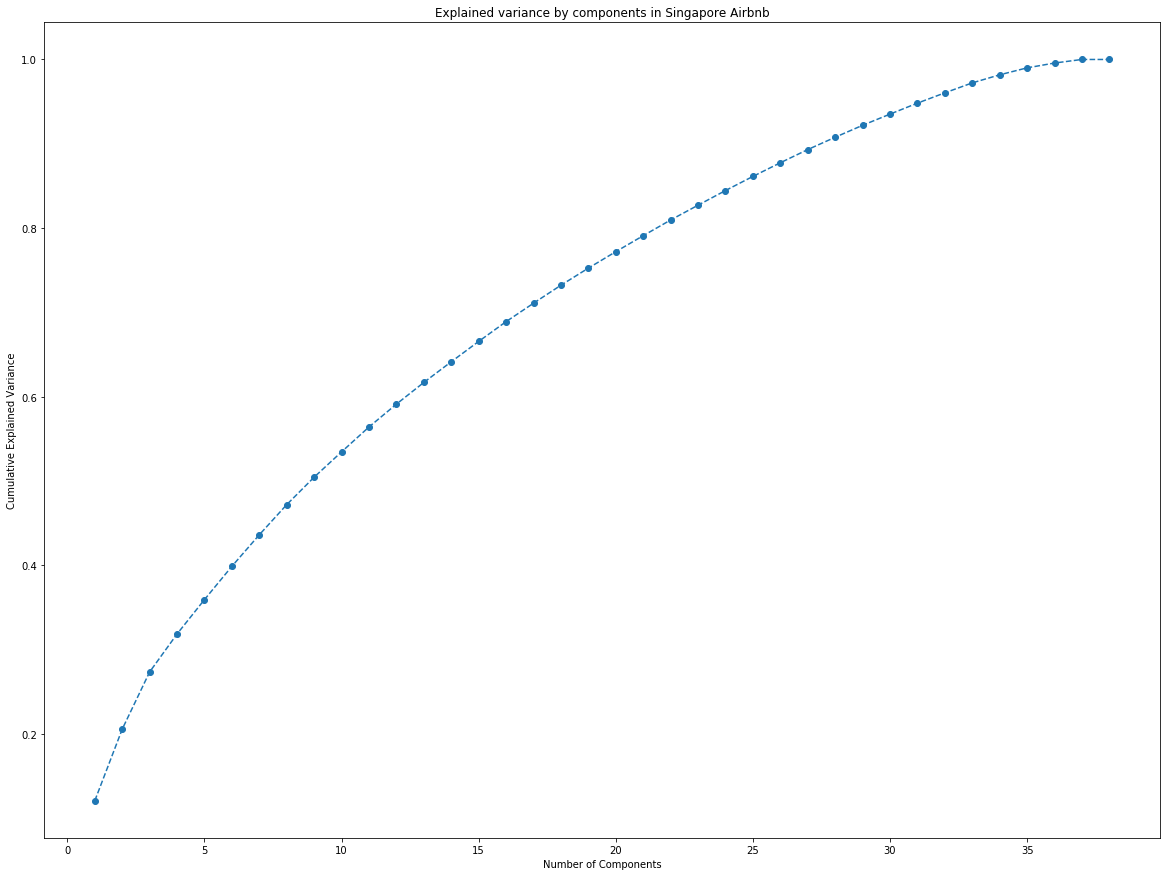

In [112]:
# For Singapore
pca_sg = pca.fit(sg_scaled)
pca_sg.explained_variance_ratio_

# Plot cumulative explained variance by components
plt.figure(figsize = (20,15))
plt.plot(range(1,39), pca_sg.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained variance by components in Singapore Airbnb')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

Since the rule of thumb is to keep variables giving up to 80% of the variance, we will be keeping the first 30 variables of `cph_cluster` and and the first 21 components of `sg_cluster`

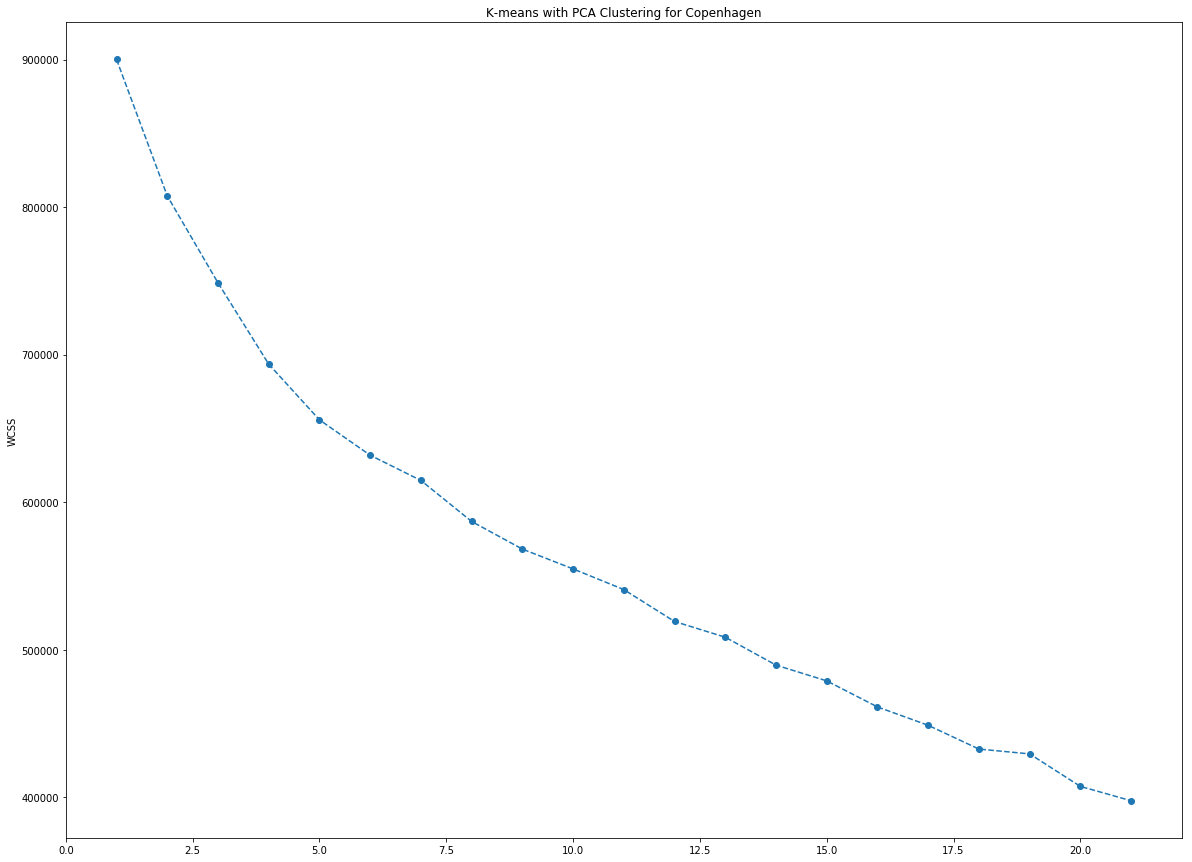

In [113]:
# For Copenhagen
pca = PCA(n_components = 21)
pca_cph = pca.fit(cph_scaled)
pca.transform(cph_scaled)
scores_pca = pca.transform(cph_scaled)

wcss = []
for i in range(1,22): 
    kmeans_pca = KMeans(n_clusters = i)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize = (20,15))
plt.plot(range(1,22), wcss, marker = 'o', linestyle = '--')
plt.xlabel = ('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering for Copenhagen')
plt.show()


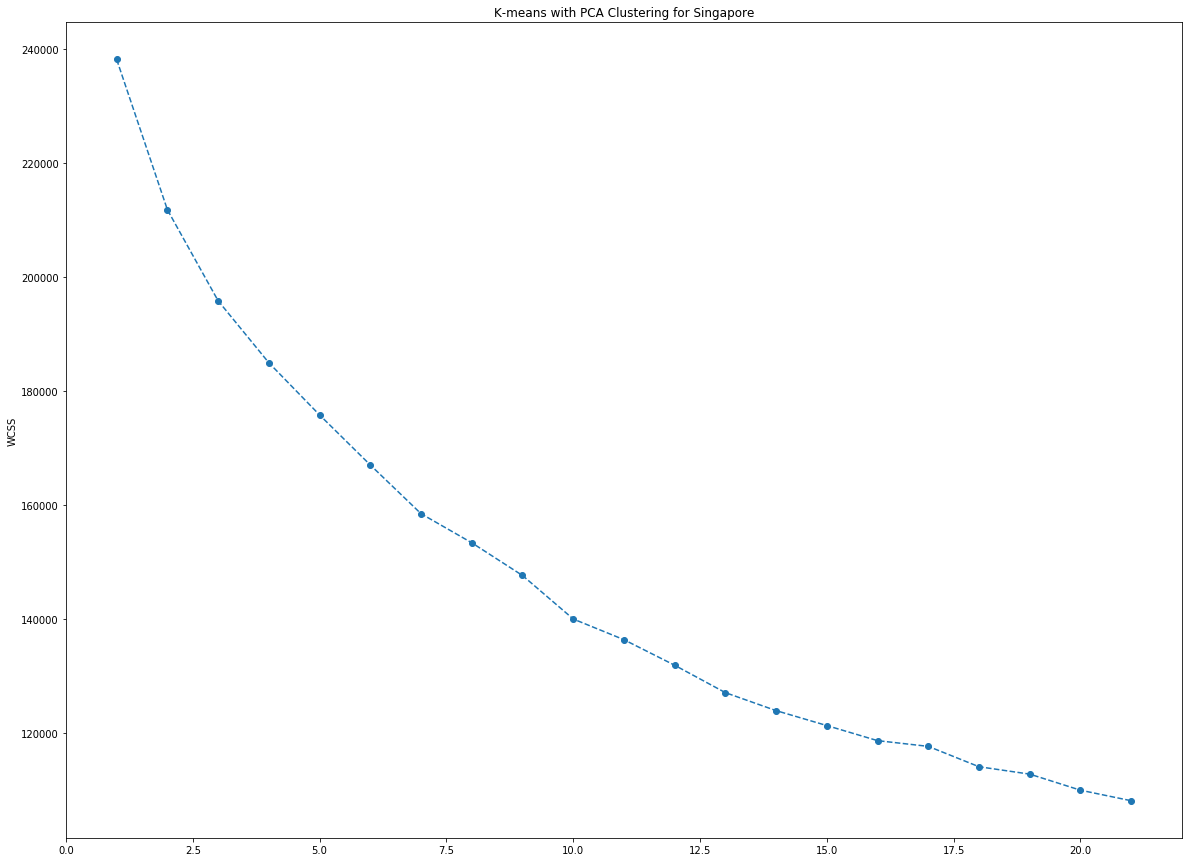

In [114]:
# For Singapore
pca = PCA(n_components = 21)
pca_cph = pca.fit(sg_scaled)
pca.transform(sg_scaled)
scores_pca = pca.transform(sg_scaled)

wcss = []
for i in range(1,22): 
    kmeans_pca = KMeans(n_clusters = i)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize = (20,15))
plt.plot(range(1,22), wcss, marker = 'o', linestyle = '--')
plt.xlabel = ('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering for Singapore')
plt.show()

#### Supervised Learning - KNN Multivariate Model

In [115]:
## Removing irrelevant columns to price
cols_to_drop = ['id','city', 'host_since']
cph_knn2 = price_filtered_cph.drop(cols_to_drop, axis = 1)
sg_knn2 = price_filtered_sg.drop(cols_to_drop, axis = 1)

## Convert catergorical variables into dummy variables with one-hot-encoding
cols_to_convert = ['property_type', 'room_type', 'neighbourhood_cleansed']
cph_knn2 = pd.get_dummies(cph_knn2, columns = cols_to_convert)
sg_knn2 =  pd.get_dummies(sg_knn2, columns = cols_to_convert)

### Drop any rows with null variables 
cph_knn2 = cph_knn2.dropna()
sg_knn2 = sg_knn2.dropna()
X_cph = cph_knn2.drop(['price'], axis = 1)
X_sg = sg_knn2.drop(['price'], axis = 1)

## Applying min-max normalisation 
cph_norm = StandardScaler().fit_transform(X_cph)
cph_norm = pd.DataFrame(cph_norm)
cph_knn2 = pd.concat([cph_norm, cph_knn2.price], axis = 1)
cph_knn2 = cph_knn2.dropna()

sg_norm = StandardScaler().fit_transform(X_sg)
sg_norm = pd.DataFrame(sg_norm)
sg_knn2 = pd.concat([sg_norm, sg_knn2.price], axis = 1)
sg_knn2 = sg_knn2.dropna()

In [186]:
# Building the Model
X_cph = cph_knn2.drop(['price'], axis = 1)
y_cph = cph_knn2['price']

# Performing Train-test Split
x_train, x_test, y_train, y_test = train_test_split(X_cph, y_cph, test_size=0.3, random_state = 42)

## Fitting the Model
knn = KNeighborsRegressor(n_neighbors=7)
cph_km = knn.fit(x_train, y_train)

In [117]:
# Evaluating performance of the model on train dataset 
y_pred = cph_km.predict(x_train)
print("R2 Score", r2_score(y_train, y_pred))
print("Mean Absolute Error: ", MAE(y_train, y_pred))
print("Root Mean Squared Error", RMSE(y_train, y_pred))

R2 Score 0.13851209181016888
Mean Absolute Error:  289.44055245860716
Root Mean Squared Error 406.6612134518355


In [118]:
## Evaluating performance of model on test dataset
y_pred = cph_km.predict(x_test)
print("Mean Absolute Error: ", MAE(y_test, y_pred))
print("R2 Score", r2_score(y_test, y_pred))
print("Root Mean Squared Error", (mean_squared_error(y_test,y_pred))**0.5)

Mean Absolute Error:  328.25040646460724
R2 Score -0.1275264920669794
Root Mean Squared Error 470.915423221798


In [119]:
## Adjusting the number of neighbours from 1-20

rmse_val = [] 
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    km = model.fit(x_train, y_train)  #fit the model
    y_pred = km.predict(x_train)
    error = RMSE(y_train, y_pred) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.0
RMSE value for k=  2 is: 310.94087982127775
RMSE value for k=  3 is: 357.62790367941284
RMSE value for k=  4 is: 380.3734420696249
RMSE value for k=  5 is: 392.60146987341705
RMSE value for k=  6 is: 400.9353834121449
RMSE value for k=  7 is: 406.6612134518355
RMSE value for k=  8 is: 411.06915153328396
RMSE value for k=  9 is: 415.069905370432
RMSE value for k=  10 is: 417.21997582048476
RMSE value for k=  11 is: 419.61622012332657
RMSE value for k=  12 is: 421.5214756673402
RMSE value for k=  13 is: 422.82322785706805
RMSE value for k=  14 is: 424.0505281780699
RMSE value for k=  15 is: 425.1601010173936
RMSE value for k=  16 is: 425.8755041609334
RMSE value for k=  17 is: 426.70626070863585
RMSE value for k=  18 is: 427.5581767044914
RMSE value for k=  19 is: 428.2479731991236
RMSE value for k=  20 is: 428.8570476285847


Need to change to x_test to get RMSE
https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

Text(0,0.5,'RMSE')

<Figure size 720x432 with 0 Axes>

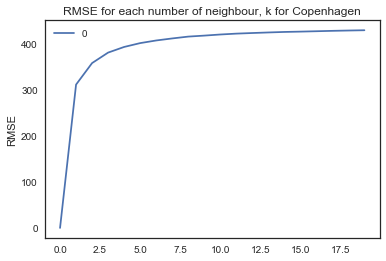

In [184]:
## Graphical representation of RMSE against K (number of neighbours)
elbow_curve = pd.DataFrame(rmse_val)
plt.figure(figsize=(10,6))
elbow_curve.plot()
plt.title('RMSE for each number of neighbour, k for Copenhagen')
#plt.xlabel('K')
plt.ylabel('RMSE')

In [187]:
## Fit into test data to get validation error

rmse_val_test = [] 
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    km2 = model.fit(x_train, y_train)  #fit the model
    y_pred2 = km2.predict(x_test)
    error = (mean_squared_error(y_test,y_pred2))**0.5 #calculate rmse
    rmse_val_test.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 628.6836836696584
RMSE value for k=  2 is: 536.8433848501002
RMSE value for k=  3 is: 505.9576288859418
RMSE value for k=  4 is: 491.4530132479685
RMSE value for k=  5 is: 482.01065996936626
RMSE value for k=  6 is: 476.32805732547286
RMSE value for k=  7 is: 470.915423221798
RMSE value for k=  8 is: 466.8670863693853
RMSE value for k=  9 is: 464.27168956707885
RMSE value for k=  10 is: 462.7412504375025
RMSE value for k=  11 is: 459.9706066976896
RMSE value for k=  12 is: 459.25065267624905
RMSE value for k=  13 is: 458.45667349592327
RMSE value for k=  14 is: 457.1479664948021
RMSE value for k=  15 is: 456.02182058091444
RMSE value for k=  16 is: 455.66788608744895
RMSE value for k=  17 is: 455.29145956992386
RMSE value for k=  18 is: 454.7778995542336
RMSE value for k=  19 is: 453.93070063702174
RMSE value for k=  20 is: 453.3273289575679


Text(0,0.5,'RMSE')

<Figure size 720x432 with 0 Axes>

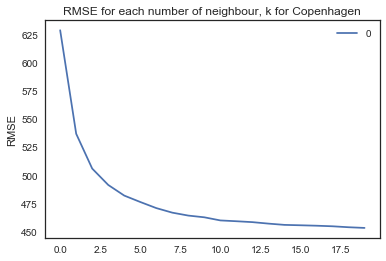

In [188]:
elbow_curve_val = pd.DataFrame(rmse_val_test)
plt.figure(figsize=(10,6))
elbow_curve_val.plot()
plt.title('RMSE for each number of neighbour, k for Copenhagen')
#plt.xlabel('K')
plt.ylabel('RMSE')

In [189]:
# For Singapore
# Building the Model
X_sg = sg_knn2.drop(['price'], axis = 1)
y_sg = sg_knn2['price']

# Performing Train-test Split
x_train, x_test, y_train, y_test = train_test_split(X_sg, y_sg, test_size=0.3, random_state = 42)

## Fitting the Model
knn = KNeighborsRegressor(n_neighbors=7)
sg_km = knn.fit(x_train, y_train)

In [190]:
y_pred = sg_km.predict(x_train)
print("Mean Absolute Error: ", MAE(y_train, y_pred))
print("R2 Score", r2_score(y_train, y_pred))
print("Root Mean Squared Error", RMSE(y_train, y_pred))

Mean Absolute Error:  74.86676798378926
R2 Score 0.16175008474173547
Root Mean Squared Error 104.79399592147631


In [191]:
y_pred = sg_km.predict(x_test)
print("Mean Absolute Error: ", MAE(y_test, y_pred))
print("R2 Score", r2_score(y_test, y_pred))
print("Root Mean Squared Error", (mean_squared_error(y_test,y_pred))**0.5)

Mean Absolute Error:  78.24658613445378
R2 Score -0.1800598351191316
Root Mean Squared Error 106.8890009117232


RMSE value for k=  1 is: 0.0
RMSE value for k=  2 is: 78.55446693231201
RMSE value for k=  3 is: 90.61808696373086
RMSE value for k=  4 is: 97.55861311795498
RMSE value for k=  5 is: 100.47725946218245
RMSE value for k=  6 is: 102.52440992090435
RMSE value for k=  7 is: 104.79399592147631
RMSE value for k=  8 is: 105.81870422640246
RMSE value for k=  9 is: 106.85033871130645
RMSE value for k=  10 is: 107.72066471928684
RMSE value for k=  11 is: 108.37842287852733
RMSE value for k=  12 is: 109.05291993513734
RMSE value for k=  13 is: 109.64056343125792
RMSE value for k=  14 is: 109.84771051576979
RMSE value for k=  15 is: 110.37782949022629
RMSE value for k=  16 is: 110.7425657592828
RMSE value for k=  17 is: 111.06405364614541
RMSE value for k=  18 is: 111.27807269552984
RMSE value for k=  19 is: 111.43806001196128
RMSE value for k=  20 is: 111.63456451689977


Text(0,0.5,'RMSE')

<Figure size 720x432 with 0 Axes>

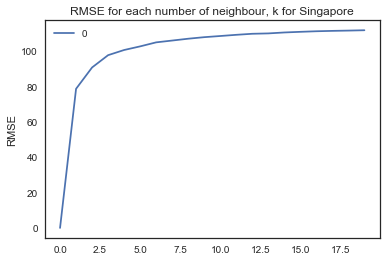

In [193]:
## Training Set
rmse_val = [] 
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    km = model.fit(x_train, y_train)  #fit the model
    y_pred = km.predict(x_train)
    error = RMSE(y_train, y_pred) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    
elbow_curve = pd.DataFrame(rmse_val)
plt.figure(figsize=(10,6))
elbow_curve.plot()
plt.title('RMSE for each number of neighbour, k for Singapore')
#plt.xlabel('K')
plt.ylabel('RMSE')

RMSE value for k=  1 is: 154.10898430694314
RMSE value for k=  2 is: 128.21846124933438
RMSE value for k=  3 is: 116.74143743705267
RMSE value for k=  4 is: 112.18959602949388
RMSE value for k=  5 is: 108.8201345853628
RMSE value for k=  6 is: 107.46401859737243
RMSE value for k=  7 is: 106.8890009117232
RMSE value for k=  8 is: 106.00835654187627
RMSE value for k=  9 is: 105.47431385106489
RMSE value for k=  10 is: 103.97103081224965
RMSE value for k=  11 is: 102.99473103419903
RMSE value for k=  12 is: 102.79080675219727
RMSE value for k=  13 is: 102.60927597407616
RMSE value for k=  14 is: 102.30928149644893
RMSE value for k=  15 is: 101.51648224943895
RMSE value for k=  16 is: 101.5115121057083
RMSE value for k=  17 is: 101.05893483932505
RMSE value for k=  18 is: 101.25885945262795
RMSE value for k=  19 is: 100.78878222800348
RMSE value for k=  20 is: 100.54479648715483


Text(0,0.5,'RMSE')

<Figure size 720x432 with 0 Axes>

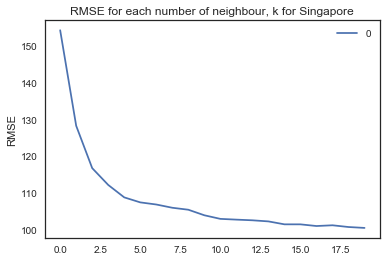

In [194]:
## Test Set
rmse_val_test = [] 
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    km2 = model.fit(x_train, y_train)  #fit the model
    y_pred2 = km2.predict(x_test)
    error = (mean_squared_error(y_test,y_pred2))**0.5 #calculate rmse
    rmse_val_test.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    
elbow_curve_val = pd.DataFrame(rmse_val_test)
plt.figure(figsize=(10,6))
elbow_curve_val.plot()
plt.title('RMSE for each number of neighbour, k for Singapore')
#plt.xlabel('K')
plt.ylabel('RMSE')

#### Supervised Learning - XGBoost
Due to technical difficulties of limited space on our desktop, the XGBoost Model is ran on Colab in the following link
https://colab.research.google.com/drive/1Q4np612_BFzWmWWtxUW4A7KiMyMQBTgf?usp=sharing

In [141]:
cph_rf2 = cph_rf.copy()
sg_rf2 = sg_rf.copy()

In [142]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

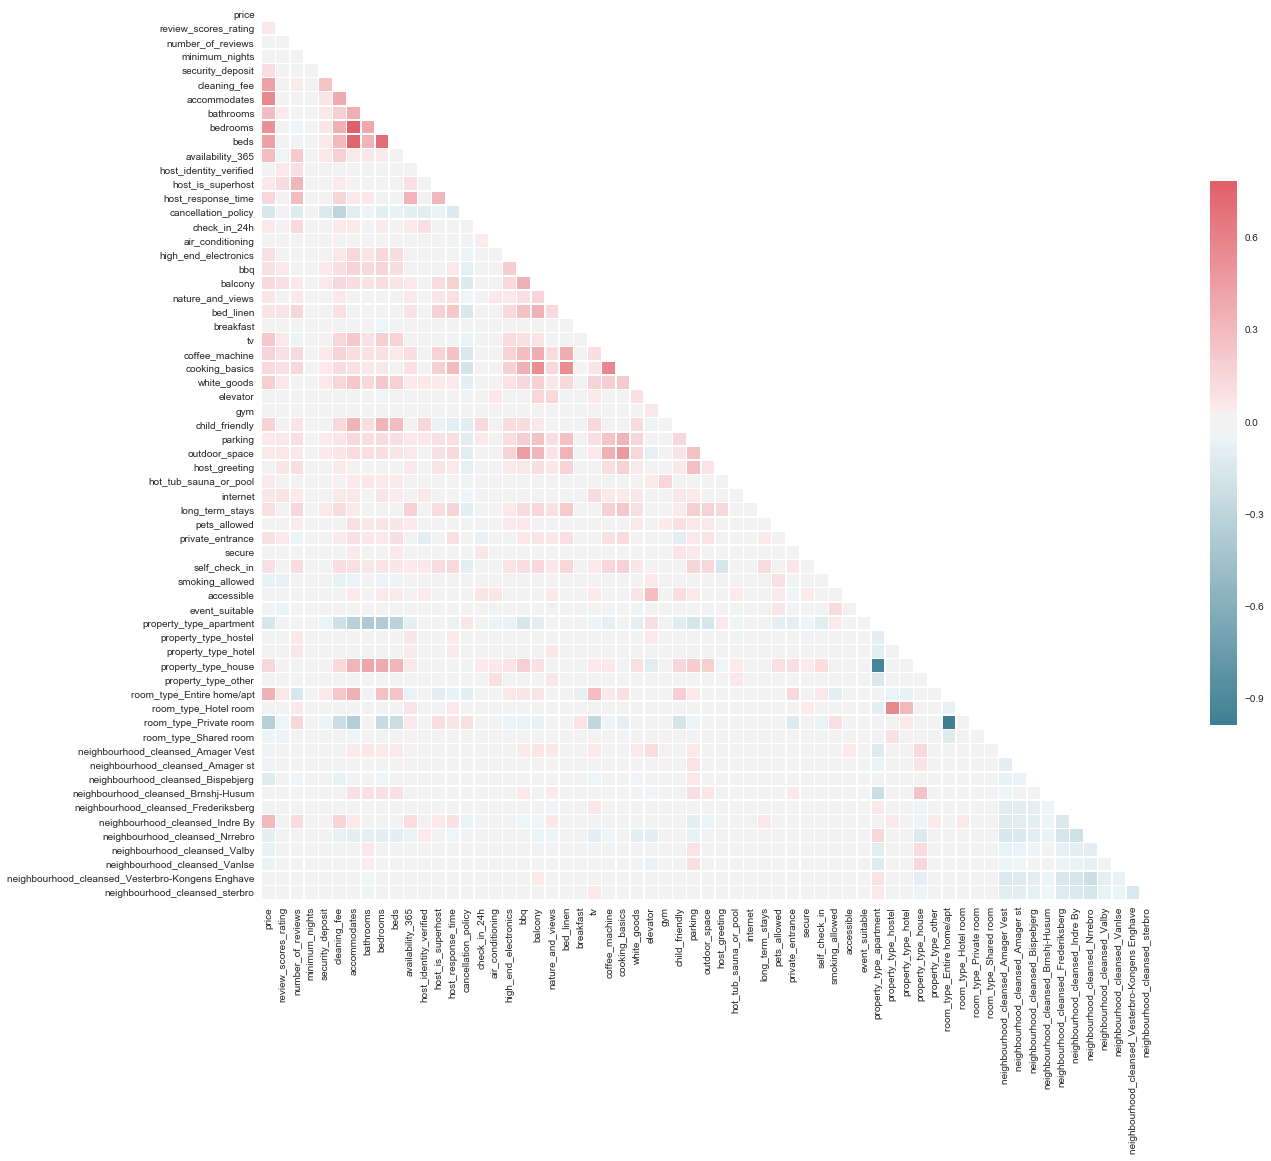

In [143]:
multi_collinearity_heatmap(cph_rf2, figsize = (20,20))

In [145]:
## Transforming positively skewed numerical features 
cph_rf2['review_scores_rating'] = cph_rf2['review_scores_rating'].replace(0.0, 0.01)
cph_rf2['review_scores_rating'] = np.log(cph_rf2['review_scores_rating'])

In [146]:
## Separating X & Y
X_cph = cph_rf2.drop('price', axis = 1)
y_cph = cph_rf2['price']

## Split train and test set
x_train, x_test, y_train, y_test = train_test_split(X_cph, y_cph, test_size = 0.3, random_state = 123)

In [ ]:
## Model 1: XGBoost 
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(x_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(x_train)
val_preds_xgb_reg = xgb_reg.predict(x_test)

## Results
print("\nTraining RMSE:", round((mean_squared_error(y_train, training_preds_xgb_reg)**0.5),4))
print("Validation RMSE:", round((mean_squared_error(y_test, val_preds_xgb_reg)**0.5),4))
print("Training MAE: ", round(mean_absolute_error(y_train, training_preds_xgb_reg),4))
print("Validation MAE: ", round(mean_absolute_error(y_test, val_preds_xgb_reg), 4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

In [ ]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=x_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

In [ ]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost Copenhagen", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

## Top 3 Variable: Room type - Value Privacy, Accomodates - How many people, and surprisinly pet-friendly (rare)

In [ ]:
## Repeat XGB Model for Singapore
## Repeat for Singapore
sg_rf2 = sg_rf.copy()

sg_rf2['review_scores_rating'] = sg_rf2['review_scores_rating'].replace(0.0, 0.01)
sg_rf2['review_scores_rating'] = np.log(sg_rf2['review_scores_rating'])

X_sg = sg_rf2.drop('price', axis = 1)
y_sg = sg_rf2['price']

## Split train and test set
x_train, x_test, y_train, y_test = train_test_split(X_sg, y_sg, test_size = 0.3, random_state = 123)

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(x_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(x_train)
val_preds_xgb_reg = xgb_reg.predict(x_test)

## Results
print("\nTraining RMSE:", round((mean_squared_error(y_train, training_preds_xgb_reg)**0.5),4))
print("Validation RMSE:", round((mean_squared_error(y_test, val_preds_xgb_reg)**0.5),4))
print("Training MAE: ", round(mean_absolute_error(y_train, training_preds_xgb_reg),4))
print("Validation MAE: ", round(mean_absolute_error(y_test, val_preds_xgb_reg), 4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

In [ ]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=x_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost Singapore", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

#### Supervised Learning - Eliminating Multi-collinearity & Including a wider dataset

Incorporate other indirect elements such as location

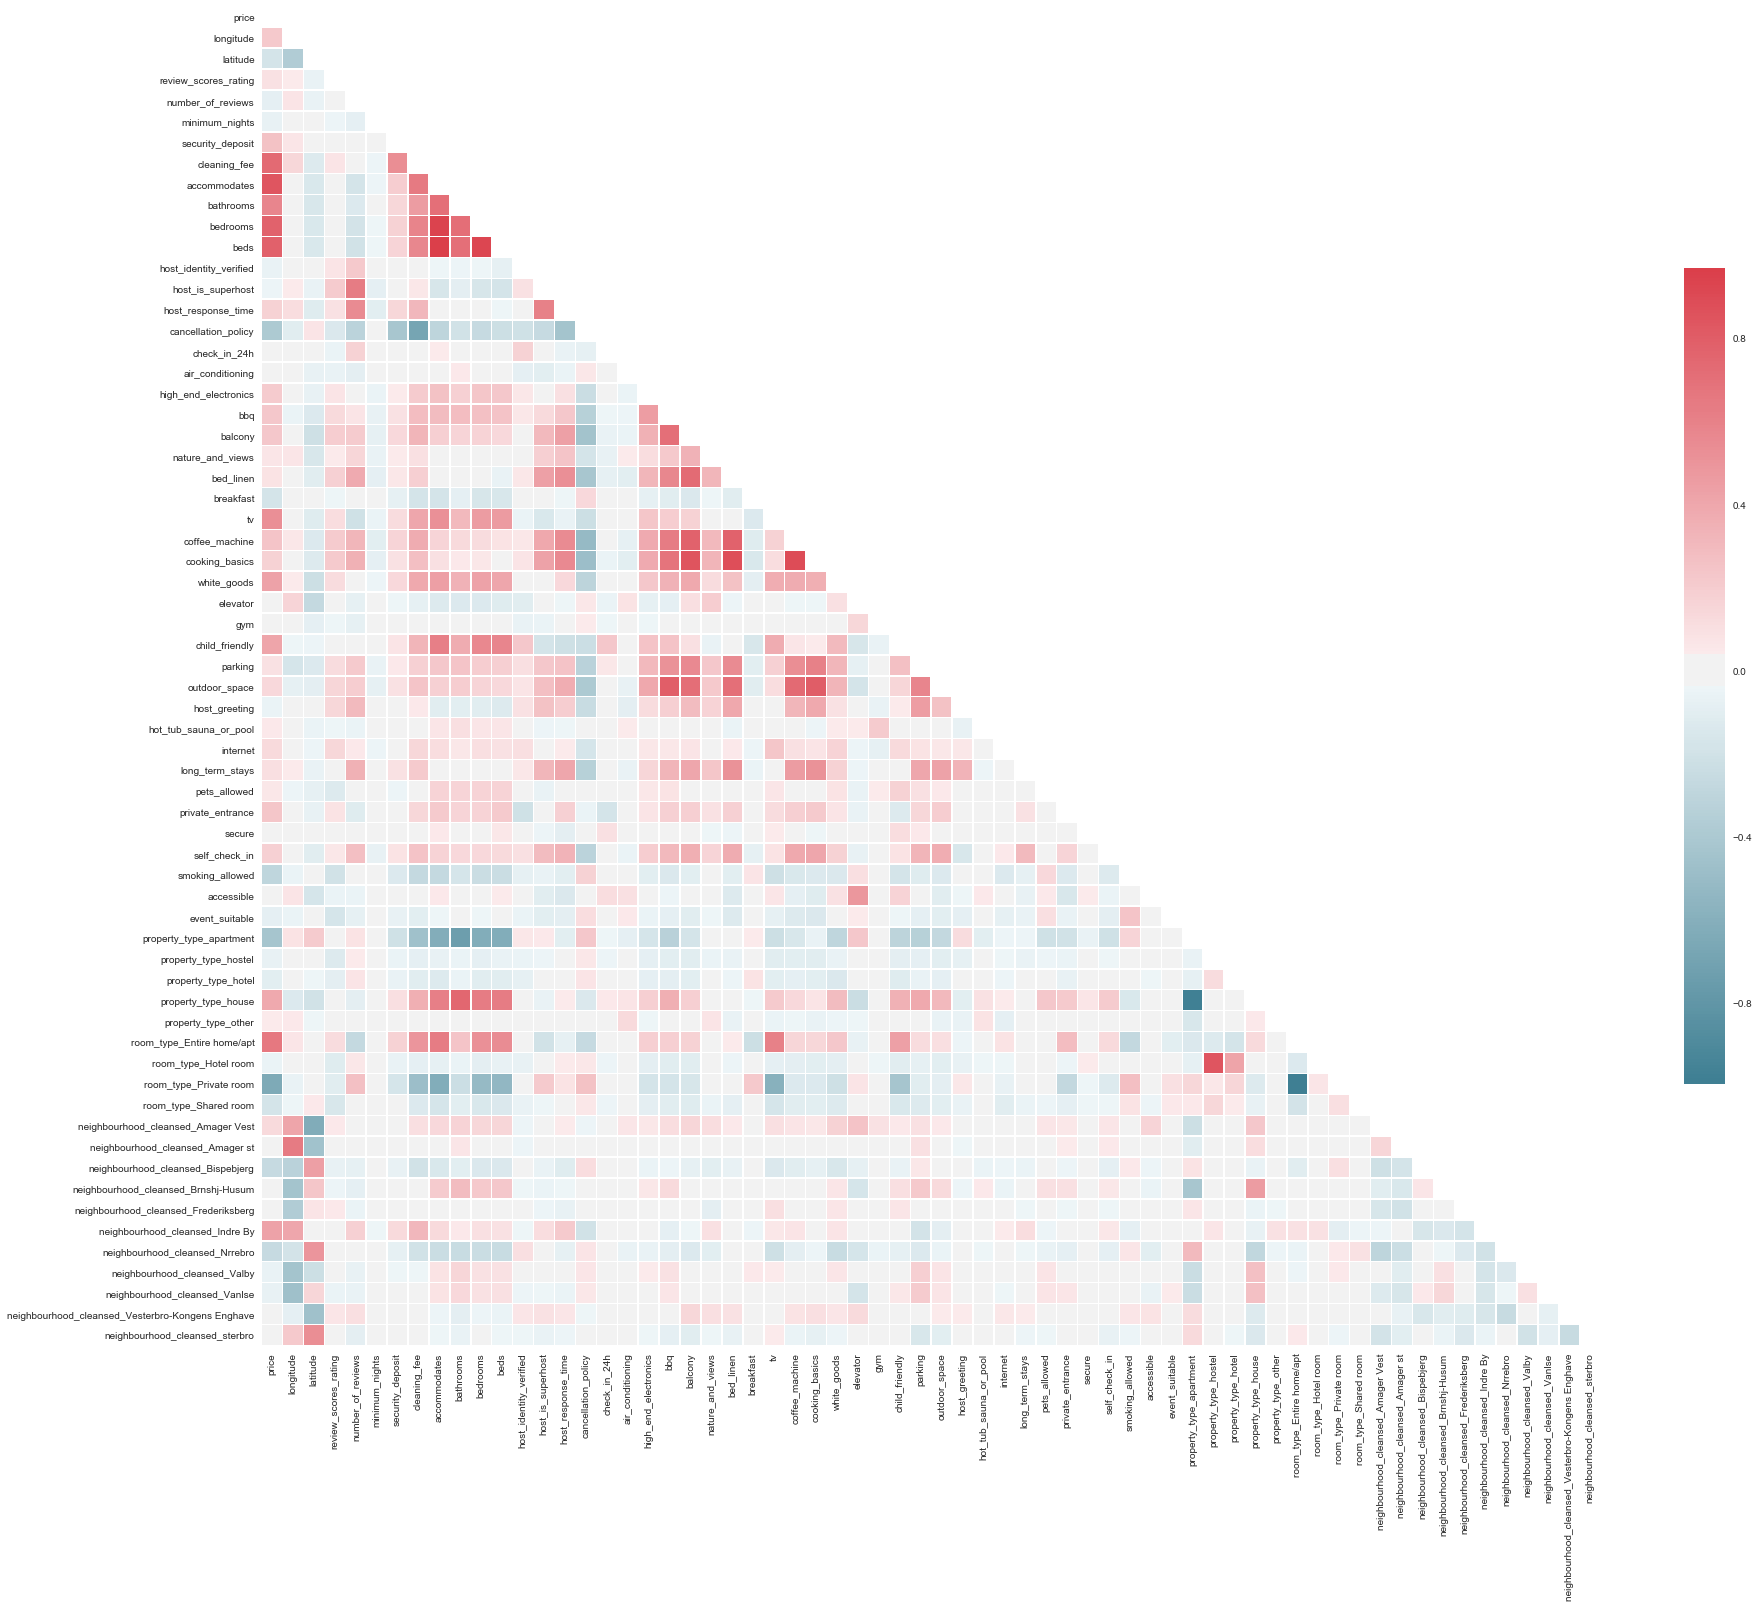

In [148]:
## Consider collinearity between all the variables in the cleaned dataset
multi_collinearity_heatmap(cph_lr.corr(), figsize = (30,30))

In [149]:
## Drop features with correlation higher than 0.6
cph_matrix = cph_lr.corr().abs()
upper_half = cph_matrix.where(np.triu(np.ones(cph_matrix.shape), k =1).astype(np.bool))
to_drop = [column for column in upper_half.columns if any(upper_half[column]> 0.6)]
to_drop

['bedrooms', 'beds', 'property_type_house', 'room_type_Private room']

In [150]:
cph_lr2 = cph_lr.drop(cph_lr[to_drop], axis = 1) 
## Columns dropped: 'property_type_house', 'room_type_Private room', 'beds'

In [151]:
## Re-running the model with all the features excluding highly correlated features
cph_lr2 = cph_lr2.dropna()
X_cph = cph_lr2.drop(['price'], axis = 1)
y_cph = cph_lr2['price']

# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cph, y_cph, test_size = 0.3, random_state = 42)

# Fit into Model
cph_lm2 = sm.OLS(y_train, X_train)
cph_fit2 = cph_lm2.fit()
cph_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     287.4
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        18:53:56   Log-Likelihood:            -1.1620e+05
No. Observations:               16187   AIC:                         2.325e+05
Df Residuals:                   16128   BIC:                         2.330e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
longitude                                         2435.9785    242.644     10.039      0.000    1960.369    2911.588
latitude                                           269.4579    347.723      0.775      0.438    -412.117     951.033
review_scores_rating                                 1.7088      0.380      4.495      0.000       0.964       2.454
number_of_reviews                                    0.0738      0.098      0.753      0.451      -0.118       0.266
minimum_nights                                      -0.2653      0.180     -1.476      0.140      -0.618       0.087
security_deposit                                     0.0006      0.001      0.584      0.559      -0.001       0.003
cleaning_fee                                         0.2649      0.013     20.507      0.000       0.240       0.290
accommodates                                       113.8744      2.029     56.133      0.000     109.898     117.851
bathrooms                                          189.0106     10.477     18.040      0.000     168.474     209.547
host_identity_verified                             -16.1114      5.257     -3.065      0.002     -26.416      -5.807
host_is_superhost                                   17.5446      8.599      2.040      0.041       0.690      34.399
host_response_time                                  17.6546      1.718     10.278      0.000      14.288      21.022
cancellation_policy                                 -8.7341      5.444     -1.604      0.109     -19.405       1.936
check_in_24h                                        35.3146     11.382      3.103      0.002      13.005      57.624
air_conditioning                                    44.1239     22.687      1.945      0.052      -0.346      88.594
high_end_electronics                                 3.3914     13.362      0.254      0.800     -22.800      29.583
bbq                                                 -4.4816     10.650     -0.421      0.674     -25.357      16.394
balcony                                             27.4334      7.826      3.506      0.000      12.094      42.773
nature_and_views                                    28.9619     11.401      2.540      0.011       6.615      51.308
bed_linen                                           -0.5096      6.562     -0.078      0.938     -13.373      12.354
breakfast                                            4.0323     14.125      0.285      0.775     -23.654      31.718
tv                                                  48.2257      5.901      8.172      0.000      36.659      59.793
coffee_machine                                      29.7764      7.231      4.118      0.000      15.603      43.950
cooking_basics                           

Results with including more variables are worse with lower adjusted R square, and extremely high condition number.

In [152]:
predictor_new = ['accommodates','beds','bedrooms', 'cleaning_fee', 'room_type_Entire home/apt', 'room_type_Private_room', 'neighbourhood_cleansed_Indre By', 'bathrooms', 'tv', 'white_goods']
cph_lr = cph_lr.dropna()
X_cph = cph_lr.filter(predictor_new, axis = 1)
y_cph = cph_lr['price']

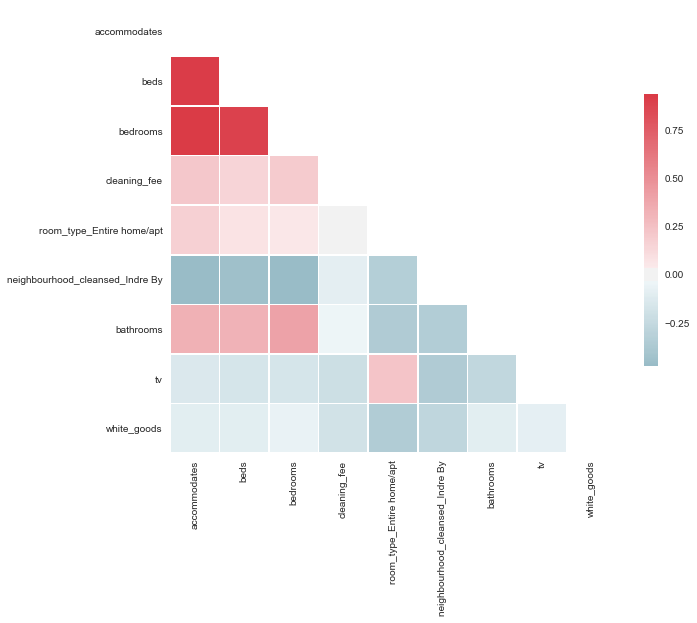

In [153]:
## Looking specifically at the correlation between the predictors used
multi_collinearity_heatmap(X_cph.corr(), figsize = (10,10))

In [154]:
cph_matrix2 = X_cph.corr().abs()
upper_half2 = cph_matrix2.where(np.triu(np.ones(cph_matrix2.shape), k =1).astype(np.bool))
to_drop = [column for column in upper_half2.columns if any(upper_half2[column]> 0.6)]
print("Variables dropped: ", to_drop) #'beds', 'bedrooms'
cph_lr2 = cph_lr.drop(cph_lr[to_drop], axis = 1) 


Variables dropped:  ['beds', 'bedrooms']


In [155]:
## Assigning X with new values
X_cph = cph_lr2.filter(predictor_new, axis = 1)
y_cph = cph_lr2['price']

# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cph, y_cph, test_size = 0.3, random_state = 42)

# Fit into Model
cph_lm3 = sm.OLS(y_train, X_train)
cph_fit3 = cph_lm3.fit()
cph_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 1.538e+04
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        18:53:56   Log-Likelihood:            -1.1684e+05
No. Observations:               16187   AIC:                         2.337e+05
Df Residuals:                   16180   BIC:                         2.338e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
accommodates                      108.0224      1.964     54.996      0.000     104.172     111.872
cleaning_fee                        0.3485      0.012     28.329      0.000       0.324       0.373
room_type_Entire home/apt         163.5244      7.202     22.704      0.000     149.407     177.642
neighbourhood_cleansed_Indre By   323.6629      7.634     42.395      0.000     308.699     338.627
bathrooms                         113.4935      6.937     16.361      0.000      99.897     127.090
tv                                 42.3865      5.964      7.107      0.000      30.697      54.076
white_goods                        46.3715      6.009      7.716      0.000      34.592      58.151
==============================================================================
Omnibus:                     8293.822   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           105992.293
Skew:                           2.163   Prob(JB):                         0.00
Kurtosis:                      14.766   Cond. No.                     1.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
y_pred = cph_fit3.predict(X_train)

print("Mean Absolute Error: ", MAE(y_train, y_pred))
print("Root Mean Squared Error", RMSE(y_train, y_pred))

Mean Absolute Error:  222.5343956439642
Root Mean Squared Error 330.0951858858499


In [157]:
y_pred2 = cph_fit3.predict(X_test)
print("Mean Absolute Error: ", MAE(y_test, y_pred2))
print("Root Mean Squared Error", (mean_squared_error(y_test,y_pred2))**0.5)
print("R2 Score", r2_score(y_test, y_pred2))

Mean Absolute Error:  223.2705825646942
Root Mean Squared Error 330.4651202593537
R2 Score 0.4385796605755483


Higher Adjusted R Square but still high condition number, implying strong multicollinearity


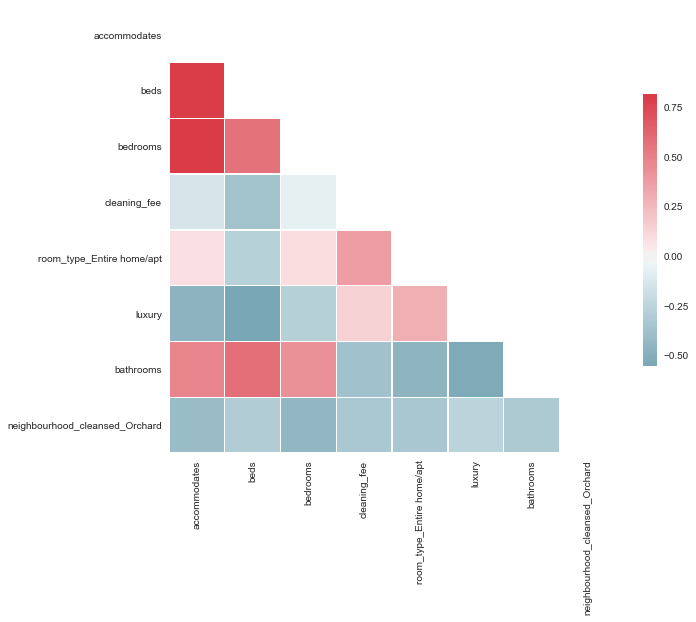

In [158]:
# For Singapore
## Recall predictors for linear model in sg_lm
predictor_sg = ['accommodates','beds','bedrooms', 'cleaning_fee', 'room_type_Entire home/apt', 'room_type_Private_room', 'luxury', 'bathrooms', 'neighbourhood_cleansed_Orchard', 'latitude ']
X_sg = sg_lr.filter(predictor_sg, axis = 1)
y_sg = sg_lr['price']

multi_collinearity_heatmap(X_sg.corr(), figsize = (10,10))

In [159]:
sg_matrix2 = X_sg.corr().abs()
upper_half2 = sg_matrix2.where(np.triu(np.ones(sg_matrix2.shape), k =1).astype(np.bool))
to_drop = [column for column in upper_half2.columns if any(upper_half2[column]> 0.6)]
print("Variables dropped: ", to_drop) # 'beds' & 'bedrooms'
sg_lr2 = sg_lr.drop(sg_lr[to_drop], axis = 1)

Variables dropped:  ['beds', 'bedrooms']


In [160]:
## Assigning X and Y 
predictor_new = ['accommodates','cleaning_fee', 'room_type_Entire home/apt', 'room_type_Private_room', 'luxury', 'bathrooms', 'neighbourhood_cleansed_Orchard', 'latitude ']
X_sg = sg_lr2.filter(predictor_new, axis = 1)
y_sg = sg_lr2['price']

### Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X_sg, y_sg, test_size = 0.3, random_state = 42)

## Building the model
sg_lm3 = sm.OLS(y_train, X_train)
sg_fit3 = sg_lm3.fit()
sg_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     3042.
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        18:53:57   Log-Likelihood:                -33160.
No. Observations:                5547   AIC:                         6.633e+04
Df Residuals:                    5541   BIC:                         6.637e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
accommodates                      21.9517      0.587     37.415      0.000      20.802      23.102
cleaning_fee                       0.4773      0.036     13.220      0.000       0.406       0.548
room_type_Entire home/apt         54.0449      2.978     18.147      0.000      48.206      59.883
luxury                            37.8724      2.468     15.347      0.000      33.035      42.710
bathrooms                          6.1009      1.117      5.461      0.000       3.911       8.291
neighbourhood_cleansed_Orchard   153.1719      9.837     15.571      0.000     133.887     172.457
==============================================================================
Omnibus:                     3742.784   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           101938.979
Skew:                           2.833   Prob(JB):                         0.00
Kurtosis:                      23.222   Cond. No.                         369.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
y_pred = sg_fit3.predict(X_train)

print("Mean Absolute Error: ", MAE(y_train, y_pred))
print("Root Mean Squared Error", RMSE(y_train, y_pred))

Mean Absolute Error:  56.195491930188446
Root Mean Squared Error 95.5012700052541


In [162]:
y_pred2 = sg_fit3.predict(X_test)
print("Mean Absolute Error: ", MAE(y_test, y_pred2))
print("Root Mean Squared Error", (mean_squared_error(y_test,y_pred2))**0.5)
print("R2 Score", r2_score(y_test, y_pred2))

Mean Absolute Error:  56.61405844956232
Root Mean Squared Error 102.68267955614385
R2 Score 0.3712049772943826


#### Supervised Learning - Linear Regression
- Feature Engineering

In [163]:
# For Copenhagen
cph_fe = price_filtered_cph.copy()

## Convert skewed price & review scores rating by applying log
cph_fe['log price'] = cph_fe['price'].replace(0.0, 0.01)
cph_fe['log price'] = np.log(cph_fe['log price'])

cph_fe['review_scores_rating'] = cph_fe['review_scores_rating'].replace(0.0, 0.01)
cph_fe['review_scores_rating'] = np.log(cph_fe['review_scores_rating'])

## To eliminate differences arising from number of accomodates
cph_fe["bedrooms_per_person"] = cph_fe["bedrooms"]/cph_fe["accommodates"]
cph_fe["bathrooms_per_person"] = cph_fe["bathrooms"]/cph_fe["accommodates"]
cph_fe['beds_per_person'] = cph_fe['beds']/cph_fe['accommodates']

## Include time element
cph_fe['host_since'] = pd.to_datetime(cph_fe['host_since'])
cph_fe['days_on_airbnb'] = (pd.to_datetime('today') - cph_fe['host_since']).dt.days

## Drop redundant features: 
cols_to_drop = ['id', 'price', 'city', 'longitude', 'latitude', 'host_since', 'bedrooms', 'bathrooms', 'beds']
cph_fe = cph_fe.drop(cols_to_drop, axis = 1)

## Convert catergorical variables into dummy variables with one-hot-encoding
cols_to_convert = ['property_type', 'room_type', 'neighbourhood_cleansed']
cph_fe = pd.get_dummies(cph_fe, columns = cols_to_convert)

### Drop any rows with null variables 
cph_fe = cph_fe.dropna()

## Check if data is preprocessed correctly
cph_fe.head()

,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,availability_365,host_identity_verified,host_is_superhost,host_response_time,cancellation_policy,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable,log price,bedrooms_per_person,bathrooms_per_person,beds_per_person,days_on_airbnb,property_type_apartment,property_type_hostel,property_type_hotel,property_type_house,property_type_other,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_cleansed_Amager Vest,neighbourhood_cleansed_Amager st,neighbourhood_cleansed_Bispebjerg,neighbourhood_cleansed_Brnshj-Husum,neighbourhood_cleansed_Frederiksberg,neighbourhood_cleansed_Indre By,neighbourhood_cleansed_Nrrebro,neighbourhood_cleansed_Valby,neighbourhood_cleansed_Vanlse,neighbourhood_cleansed_Vesterbro-Kongens Enghave,neighbourhood_cleansed_sterbro
0,4.564348,168,2,0.0,34.0,2,0,0,0,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.921578,0.500000,0.500000,0.500000,4034,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,4.584967,50,3,5000.0,1100.0,6,333,0,0,2.0,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.781973,0.666667,0.250000,0.666667,3694,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,4.499810,292,3,3736.0,523.0,12,81,1,0,4.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.040125,0.500000,0.208333,0.583333,3689,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4.584967,22,7,0.0,300.0,2,26,0,0,2.0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.685861,0.500000,0.500000,0.500000,3666,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4.543295,90,7,0.0,75.0,4,0,1,0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.759255,0.750000,0.250000,0.750000,3663,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


C:\Users\Seng Jing Yi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Skewness: -0.813313
Kurtosis: 19.940785


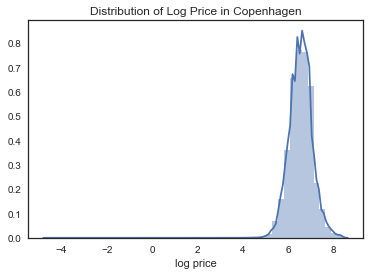

In [164]:
## Price distribution after applying log to price
sns.distplot(cph_fe['log price'], kde=True,).set_title('Distribution of Log Price in Copenhagen')
print("Skewness: %f" % cph_fe['log price'].skew())
print("Kurtosis: %f" % cph_fe['log price'].kurt())

Text(0.5,1,'Correlation Plot of Variables wrt Log Price in Copenhagen')

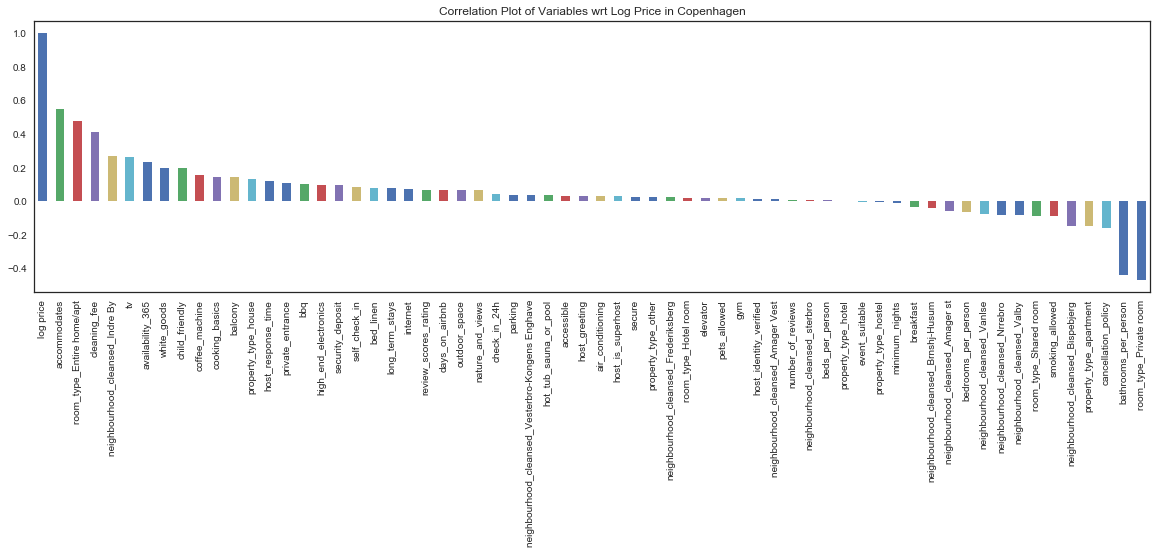

In [165]:
## Identifying features correlated with log price
corr_cph_fe = cph_fe.corr()['log price']
corr_cph_fe = corr_cph_fe.sort_values(ascending = False)
corr_cph_fe

corr_cph_fe.plot(kind = 'bar', figsize = (20,5))
plt.title("Correlation Plot of Variables wrt Log Price in Copenhagen")

In [166]:
predictor = ['accommodates','room_type_Entire home/apt', 'room_type_Private_room', 'bathrooms_per_person', 'cleaning_fee']
X_cph = cph_fe.filter(predictor, axis = 1)
y_cph = cph_fe['log price']

# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cph, y_cph, test_size = 0.3, random_state = 42)

# Fit into Model
cph_felm = sm.OLS(y_train, X_train)
cph_fefit = cph_felm.fit()
cph_fefit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log price   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.970e+05
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        18:54:00   Log-Likelihood:                -21818.
No. Observations:               16187   AIC:                         4.364e+04
Df Residuals:                   16183   BIC:                         4.367e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
accommodates                  0.7118      0.005    154.104      0.000       0.703       0.721
room_type_Entire home/apt     1.8956      0.019     98.694      0.000       1.858       1.933
bathrooms_per_person          6.2631      0.025    246.730      0.000       6.213       6.313
cleaning_fee                  0.0001   3.43e-05      4.032      0.000     7.1e-05       0.000
==============================================================================
Omnibus:                    13280.303   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2458590.105
Skew:                          -3.151   Prob(JB):                         0.00
Kurtosis:                      63.046   Cond. No.                     1.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [167]:
y_pred = cph_fefit.predict(X_train)

print("Mean Absolute Error: ", MAE(y_train, y_pred))
print("Root Mean Squared Error", RMSE(y_train, y_pred))

Mean Absolute Error:  0.6167873995174451
Root Mean Squared Error 0.9313957148897724


In [168]:
y_pred2 = cph_fefit.predict(X_test)
print("Mean Absolute Error: ", MAE(y_test, y_pred2))
print("Root Mean Squared Error", (mean_squared_error(y_test,y_pred2))**0.5)
print("R2 Score", r2_score(y_test, y_pred2))

Mean Absolute Error:  0.6215019108147393
Root Mean Squared Error 0.9034908536061989
R2 Score -2.3399766596218736


In [169]:
# For Singapore
sg_fe = price_filtered_sg.copy()

## Convert skewed price & review scores rating by applying log
sg_fe['log price'] = sg_fe['price'].replace(0.0, 0.01)
sg_fe['log price'] = np.log(sg_fe['log price'])

sg_fe['review_scores_rating'] = sg_fe['review_scores_rating'].replace(0.0, 0.01)
sg_fe['review_scores_rating'] = np.log(sg_fe['review_scores_rating'])

## To eliminate differences arising from number of accomodates
sg_fe["bedrooms_per_person"] = sg_fe["bedrooms"]/sg_fe["accommodates"]
sg_fe["bathrooms_per_person"] = sg_fe["bathrooms"]/sg_fe["accommodates"]
sg_fe['beds_per_person'] = sg_fe['beds']/sg_fe['accommodates']

## Include time element
sg_fe['host_since'] = pd.to_datetime(sg_fe['host_since'])
sg_fe['days_on_airbnb'] = (pd.to_datetime('today') - sg_fe['host_since']).dt.days

## Drop redundant features: 
cols_to_drop = ['id', 'price', 'city', 'longitude', 'latitude', 'host_since', 'bedrooms', 'bathrooms', 'beds']
sg_fe = sg_fe.drop(cols_to_drop, axis = 1)

## Convert catergorical variables into dummy variables with one-hot-encoding
cols_to_convert = ['property_type', 'room_type', 'neighbourhood_cleansed']
sg_fe = pd.get_dummies(sg_fe, columns = cols_to_convert)

### Drop any rows with null variables 
sg_fe = sg_fe.dropna()

## Check if data is preprocessed correctly
sg_fe.head()

,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,availability_365,host_identity_verified,host_is_superhost,host_response_time,cancellation_policy,air_con,check_in,cooking,childcare,entertainment,luxury,nature,clothing,accessibility,safety,internet,comfort,essentials,pet_friendly,smoking,log price,bedrooms_per_person,bathrooms_per_person,beds_per_person,days_on_airbnb,property_type_apartment,property_type_hostel,property_type_hotel,property_type_house,property_type_other,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_cleansed_Ang Mo Kio,neighbourhood_cleansed_Bedok,neighbourhood_cleansed_Bishan,neighbourhood_cleansed_Bukit Batok,neighbourhood_cleansed_Bukit Merah,neighbourhood_cleansed_Bukit Panjang,neighbourhood_cleansed_Bukit Timah,neighbourhood_cleansed_Central Water Catchment,neighbourhood_cleansed_Choa Chu Kang,neighbourhood_cleansed_Clementi,neighbourhood_cleansed_Downtown Core,neighbourhood_cleansed_Geylang,neighbourhood_cleansed_Hougang,neighbourhood_cleansed_Jurong East,neighbourhood_cleansed_Jurong West,neighbourhood_cleansed_Kallang,neighbourhood_cleansed_Mandai,neighbourhood_cleansed_Marina South,neighbourhood_cleansed_Marine Parade,neighbourhood_cleansed_Museum,neighbourhood_cleansed_Newton,neighbourhood_cleansed_Novena,neighbourhood_cleansed_Orchard,neighbourhood_cleansed_Outram,neighbourhood_cleansed_Pasir Ris,neighbourhood_cleansed_Pioneer,neighbourhood_cleansed_Punggol,neighbourhood_cleansed_Queenstown,neighbourhood_cleansed_River Valley,neighbourhood_cleansed_Rochor,neighbourhood_cleansed_Sembawang,neighbourhood_cleansed_Sengkang,neighbourhood_cleansed_Serangoon,neighbourhood_cleansed_Singapore River,neighbourhood_cleansed_Southern Islands,neighbourhood_cleansed_Sungei Kadut,neighbourhood_cleansed_Tampines,neighbourhood_cleansed_Tanglin,neighbourhood_cleansed_Toa Payoh,neighbourhood_cleansed_Western Water Catchment,neighbourhood_cleansed_Woodlands,neighbourhood_cleansed_Yishun
0,4.543295,1,180,0.0,0.0,1,365,0,0,2.0,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4.430817,1.000000,1.000000,1.000000,3508,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,4.510860,18,90,0.0,0.0,2,365,0,0,2.0,2,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,4.382027,0.500000,0.500000,0.500000,3550,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.584967,20,6,0.0,0.0,1,365,0,0,2.0,3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4.248495,1.000000,1.000000,1.000000,3508,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4.488636,20,1,279.0,56.0,6,365,1,0,4.0,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,5.332719,0.333333,0.166667,0.500000,3407,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4.418841,24,1,140.0,28.0,3,365,1,0,4.0,2,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,4.553877,0.333333,0.166667,0.333333,3407,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


C:\Users\Seng Jing Yi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Skewness: -0.392899
Kurtosis: 4.513527


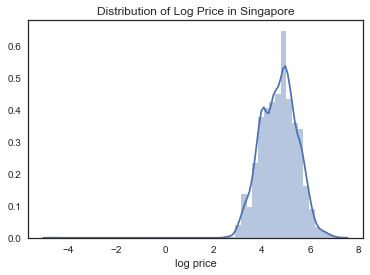

In [170]:
## Price distribution after applying log to price
sns.distplot(sg_fe['log price'], kde=True,).set_title('Distribution of Log Price in Singapore')
print("Skewness: %f" % sg_fe['log price'].skew())
print("Kurtosis: %f" % sg_fe['log price'].kurt())

In [171]:
corr_sg_fe = sg_fe.corr()['log price']
corr_sg_fe = corr_sg_fe.sort_values(ascending = False)
corr_sg_fe

log price                                  1.000000
room_type_Entire home/apt                  0.590686
accommodates                               0.515042
cleaning_fee                               0.376057
luxury                                     0.274634
childcare                                  0.218749
cooking                                    0.208178
entertainment                              0.207841
security_deposit                           0.200429
pet_friendly                               0.190340
neighbourhood_cleansed_Downtown Core       0.185317
smoking                                    0.158648
accessibility                              0.154418
air_con                                    0.154027
host_is_superhost                          0.147056
neighbourhood_cleansed_Orchard             0.123882
neighbourhood_cleansed_Novena              0.107045
host_response_time                         0.087929
nature                                     0.082771
clothing    

Text(0.5,1,'Correlation Plot of Variables wrt Log Price in Singapore')

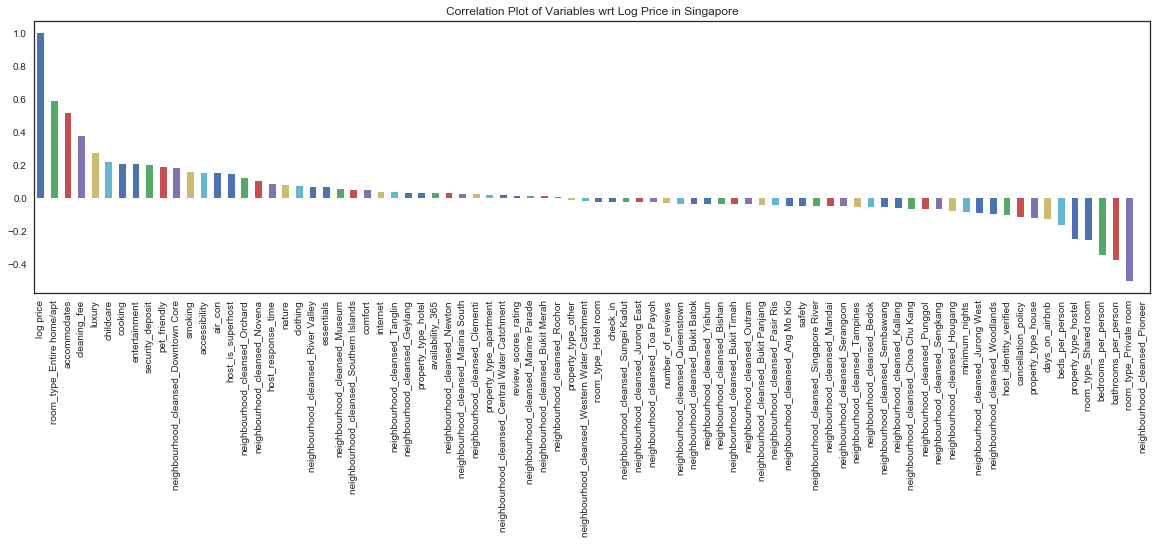

In [172]:
corr_sg_fe.plot(kind = 'bar', figsize = (20,5))
plt.title("Correlation Plot of Variables wrt Log Price in Singapore")

In [173]:
predictor = ['accommodates','room_type_Entire home/apt', 'room_type_Private_room', 'bathrooms_per_person', 'cleaning_fee']
X_sg = sg_fe.filter(predictor, axis = 1)
y_sg = sg_fe['log price']

# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sg, y_sg, test_size = 0.3, random_state = 42)

# Fit into Model
sg_felm = sm.OLS(y_train, X_train)
sg_fefit = sg_felm.fit()
sg_fefit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     4584.
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        18:54:03   Log-Likelihood:                -7127.1
No. Observations:                3461   AIC:                         1.426e+04
Df Residuals:                    3457   BIC:                         1.429e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
accommodates                  0.5236      0.011     47.402      0.000       0.502       0.545
room_type_Entire home/apt     1.8248      0.070     26.099      0.000       1.688       1.962
bathrooms_per_person          1.3132      0.031     42.347      0.000       1.252       1.374
cleaning_fee                  0.0123      0.001     12.946      0.000       0.010       0.014
==============================================================================
Omnibus:                     1556.456   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17653.534
Skew:                          -1.834   Prob(JB):                         0.00
Kurtosis:                      13.439   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
y_pred = sg_fefit.predict(X_train)

print("Mean Absolute Error: ", MAE(y_train, y_pred))
print("Root Mean Squared Error", RMSE(y_train, y_pred))

Mean Absolute Error:  1.5039675985488605
Root Mean Squared Error 1.8970733767001653


In [175]:
y_pred2 = sg_fefit.predict(X_test)
print("Mean Absolute Error: ", MAE(y_test, y_pred2))
print("Root Mean Squared Error", (mean_squared_error(y_test,y_pred2))**0.5)
print("R2 Score", r2_score(y_test, y_pred2))

Mean Absolute Error:  1.4706411698186728
Root Mean Squared Error 1.871094144377381
R2 Score -5.4758193103293085
